In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

import cPickle as pickle

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

# ========================================================
# Setup trainX and trainY for each target variable
# ========================================================

In [2]:
pos_corr_agg = ['inv_agg_rank',
                u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_FGA_3PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT', u'TM_TOV_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [3]:
pos_corr_clutch_agg = ['inv_clutch_agg_rank',
                       u'PCT_FGM', u'PCT_FGA', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'W', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [4]:
pos_corr_risk = ['inv_game_risk',
                 u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', 
       u'PCT_AST', u'PCT_STL', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [5]:
pos_corr_fp_mean = ['fp_mean',
                    u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [6]:
pos_corr_fp_std = ['fp_std',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [7]:
pos_corr_fp_var = ['fp_var',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [8]:
# Creating 3 dataframes because clutch stats has 50% null values in target and std/var have a couple of null values
df_model = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_clutch = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_std_var = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')

In [9]:
df_model.drop('Unnamed: 0', axis=1,inplace=True)
df_model_clutch.drop('Unnamed: 0', axis=1,inplace=True)
df_model_std_var.drop('Unnamed: 0', axis=1,inplace=True)

# Drop all NaN values from player name, team abbreviation and age
df_model.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_clutch.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_std_var.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

In [10]:
df_model['inv_agg_rank'] = df_model['agg_rank'] * -1
df_model['inv_game_risk'] = df_model['game_risk'] * -1
df_model_clutch['inv_clutch_agg_rank'] = df_model['clutch_agg_rank'] * -1

In [11]:
# Dropping clutch rank since it will not be used in this dataframe
df_model.drop('clutch_agg_rank', inplace=True, axis=1)
df_model_std_var.drop('clutch_agg_rank', inplace=True, axis=1)

In [12]:
# Features that were previously removed from creating dummy variables
df_model.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [13]:
# Features that were previously removed from creating dummy variables
df_model_clutch.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [14]:
# Features that were previously removed from creating dummy variables
df_model_std_var.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [15]:
df_model.dropna(inplace=True)
df_model_clutch.dropna(inplace=True)
df_model_std_var.dropna(inplace=True)

In [16]:
# Setup trainX and trainY for each target variable to run on
df_corr_agg = df_model[pos_corr_agg]
df_corr_game_risk = df_model[pos_corr_risk]
df_corr_fp_mean = df_model[pos_corr_fp_mean]

# Specifically for std and var due to difference NaN values
df_corr_fp_std = df_model_std_var[pos_corr_fp_std]
df_corr_fp_var = df_model_std_var[pos_corr_fp_var]

# Specifically for clutch due to different NaN values
df_corr_clutch_agg = df_model_clutch[pos_corr_clutch_agg]

In [17]:
y_agg = df_corr_agg.inv_agg_rank.values
X_agg = df_corr_agg.ix[:,1:]

y_clutch = df_corr_clutch_agg.inv_clutch_agg_rank.values
X_clutch = df_corr_clutch_agg.ix[:,1:]

y_game_risk = df_corr_game_risk.inv_game_risk.values
X_game_risk = df_corr_game_risk.ix[:,1:]

y_fp_mean = df_corr_fp_mean.fp_mean.values
X_fp_mean = df_corr_fp_mean.ix[:,1:]

y_fp_std = df_corr_fp_std.fp_std.values
X_fp_std = df_corr_fp_std.ix[:,1:]

y_fp_var = df_corr_fp_var.fp_var.values
X_fp_var = df_corr_fp_var.ix[:,1:]

In [18]:
ss = StandardScaler()

X_agg_n = ss.fit_transform(X_agg)
X_clutch_n = ss.fit_transform(X_clutch)
X_game_risk_n = ss.fit_transform(X_game_risk)
X_fp_mean_n = ss.fit_transform(X_fp_mean)
X_fp_std_n = ss.fit_transform(X_fp_std)
X_fp_var_n = ss.fit_transform(X_fp_var)

In [19]:
# Train-Test split for Linear/Logistic Regression

trainX_agg_n, testX_agg_n, trainY_agg_n, testY_agg_n = train_test_split(X_agg_n, y_agg, train_size=0.75)
print 'Agg Rank\n'
print trainX_agg_n.shape, trainY_agg_n.shape
print testX_agg_n.shape, testY_agg_n.shape
print '=======================\n'

trainX_clutch_n, testX_clutch_n, trainY_clutch_n, testY_clutch_n = train_test_split(X_clutch_n, y_clutch, train_size=0.75)
print 'Agg Clutch Rank\n'
print trainX_clutch_n.shape, trainY_clutch_n.shape
print testX_clutch_n.shape, testY_clutch_n.shape
print '=======================\n'

trainX_game_risk_n, testX_game_risk_n, trainY_game_risk_n, testY_game_risk_n = train_test_split(X_game_risk_n, y_game_risk, train_size=0.75, stratify=y_game_risk)
print 'Game Risk\n'
print trainX_game_risk_n.shape, trainY_game_risk_n.shape
print testX_game_risk_n.shape, testY_game_risk_n.shape
print '=======================\n'

trainX_fp_mean_n, testX_fp_mean_n, trainY_fp_mean_n, testY_fp_mean_n = train_test_split(X_fp_mean_n, y_fp_mean, train_size=0.75)
print 'FP Mean\n'
print trainX_fp_mean_n.shape, trainY_fp_mean_n.shape
print testX_fp_mean_n.shape, testY_fp_mean_n.shape
print '=======================\n'

trainX_fp_std_n, testX_fp_std_n, trainY_fp_std_n, testY_fp_std_n = train_test_split(X_fp_std_n, y_fp_std, train_size=0.75)
print 'FP Std\n'
print trainX_fp_std_n.shape, trainY_fp_std_n.shape
print testX_fp_std_n.shape, testY_fp_std_n.shape
print '=======================\n'

trainX_fp_var_n, testX_fp_var_n, trainY_fp_var_n, testY_fp_var_n = train_test_split(X_fp_var_n, y_fp_var, train_size=0.75)
print 'FP Var\n'
print trainX_fp_var_n.shape, trainY_fp_var_n.shape
print testX_fp_var_n.shape, testY_fp_var_n.shape
print '=======================\n'

Agg Rank

(6721, 91) (6721,)
(2241, 91) (2241,)

Agg Clutch Rank

(3705, 83) (3705,)
(1235, 83) (1235,)

Game Risk

(6721, 83) (6721,)
(2241, 83) (2241,)

FP Mean

(6721, 87) (6721,)
(2241, 87) (2241,)

FP Std

(6721, 85) (6721,)
(2241, 85) (2241,)

FP Var

(6721, 85) (6721,)
(2241, 85) (2241,)



# ========================================================
# Linear/Logistic/Regularization Results
# ========================================================

In [20]:
linreg = LinearRegression()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
encv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200, fit_intercept=True, cv=5)
ridgecv = RidgeCV(fit_intercept=True, cv=5, alphas=np.logspace(-5,3,200))
lassocv = LassoCV(n_alphas=200, fit_intercept=True, cv=5)
onevsall = OneVsRestClassifier(AdaBoostClassifier(base_estimator=LogisticRegression(solver='sag'), n_estimators=50))

In [21]:
linreg_params = {
    'fit_intercept': [True, False]
}

logreg_params = {
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2'],
}

knn_params = {
    'n_neighbors': [3,4,5,6,7],
    'weights': ['uniform', 'distance']
}

In [22]:
estimator_linreg_agg = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_clutch = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_mean = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_std = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_var = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_logreg_game_risk = GridSearchCV(logreg, logreg_params, n_jobs=-1, cv=5, verbose=1)
estimator_knn_game_risk = GridSearchCV(knn, knn_params, n_jobs=4, cv=5, verbose=1)

In [23]:
model_linreg_agg = estimator_linreg_agg.fit(trainX_agg_n, trainY_agg_n)
model_linreg_clutch = estimator_linreg_clutch.fit(trainX_clutch_n, trainY_clutch_n)
model_linreg_fp_mean = estimator_linreg_fp_mean.fit(trainX_fp_mean_n, trainY_fp_mean_n)
model_linreg_fp_std = estimator_linreg_fp_std.fit(trainX_fp_std_n, trainY_fp_std_n)
model_linreg_fp_var = estimator_linreg_fp_var.fit(trainX_fp_var_n, trainY_fp_var_n)
model_logreg_game_risk = estimator_logreg_game_risk.fit(trainX_game_risk_n, trainY_game_risk_n)
model_knn_game_risk = estimator_knn_game_risk.fit(trainX_game_risk_n, trainY_game_risk_n)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   48.1s finished


In [24]:
prediction_linreg_agg = estimator_linreg_agg.predict(testX_agg_n)
prediction_linreg_clutch = estimator_linreg_clutch.predict(testX_clutch_n)
prediction_linreg_fp_mean = estimator_linreg_fp_mean.predict(testX_fp_mean_n)
prediction_linreg_fp_std = estimator_linreg_fp_std.predict(testX_fp_std_n)
prediction_linreg_fp_var = estimator_linreg_fp_var.predict(testX_fp_var_n)
prediction_logreg_game_risk_proba = estimator_logreg_game_risk.predict_proba(testX_game_risk_n)
prediction_logreg_game_risk = estimator_logreg_game_risk.predict(testX_game_risk_n)
prediction_knn_game_risk = estimator_knn_game_risk.predict(testX_game_risk_n)

# Elastic Net

In [25]:
model_en_agg = encv.fit(trainX_agg_n, trainY_agg_n)
prediction_en_agg = model_en_agg.predict(testX_agg_n)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [26]:
model_en_clutch = encv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_en_clutch = model_en_clutch.predict(testX_clutch_n)

In [27]:
model_en_fp_mean = encv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_en_fp_mean = model_en_fp_mean.predict(testX_fp_mean_n)

In [28]:
model_en_fp_std = encv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_en_fp_std = model_en_fp_std.predict(testX_fp_std_n)

In [29]:
model_en_fp_var = encv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_en_fp_var = model_en_fp_var.predict(testX_fp_var_n)

In [30]:
model_en_game_risk = encv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_en_game_risk = model_en_game_risk.predict(testX_game_risk_n)

# Ridge

In [31]:
model_ridge_agg = ridgecv.fit(trainX_agg_n, trainY_agg_n)
prediction_ridge_agg = model_ridge_agg.predict(testX_agg_n)

In [32]:
model_ridge_clutch = ridgecv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_ridge_clutch = model_ridge_clutch.predict(testX_clutch_n)

In [33]:
model_ridge_fp_mean = ridgecv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_ridge_fp_mean = model_ridge_fp_mean.predict(testX_fp_mean_n)

In [34]:
model_ridge_fp_std = ridgecv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_ridge_fp_std = model_ridge_fp_std.predict(testX_fp_std_n)

In [35]:
model_ridge_fp_var = ridgecv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_ridge_fp_var = model_ridge_fp_var.predict(testX_fp_var_n)

In [36]:
model_ridge_game_risk = ridgecv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_ridge_game_risk = model_ridge_game_risk.predict(testX_game_risk_n)

# Lasso

In [37]:
model_lasso_agg = lassocv.fit(trainX_agg_n, trainY_agg_n)
prediction_lasso_agg = model_lasso_agg.predict(testX_agg_n)

In [38]:
model_lasso_clutch = lassocv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_lasso_clutch = model_lasso_clutch.predict(testX_clutch_n)

In [39]:
model_lasso_fp_mean = lassocv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_lasso_fp_mean = model_lasso_fp_mean.predict(testX_fp_mean_n)

In [40]:
model_lasso_fp_std = lassocv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_lasso_fp_std = model_lasso_fp_std.predict(testX_fp_std_n)

In [41]:
model_lasso_fp_var = lassocv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_lasso_fp_var = model_lasso_fp_var.predict(testX_fp_var_n)

In [42]:
model_lasso_game_risk = lassocv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_lasso_game_risk = model_lasso_game_risk.predict(testX_game_risk_n)

# Combined Linear Regression, Lasso, Ridge, ElasticNet Comparison

Agg Rank
R-squared - LinReg 0.82839084971
R-squared - Lasso 0.835380955217
R-squared - Ridge 0.836962487549
R-squared - ElasticNet 0.835380955217


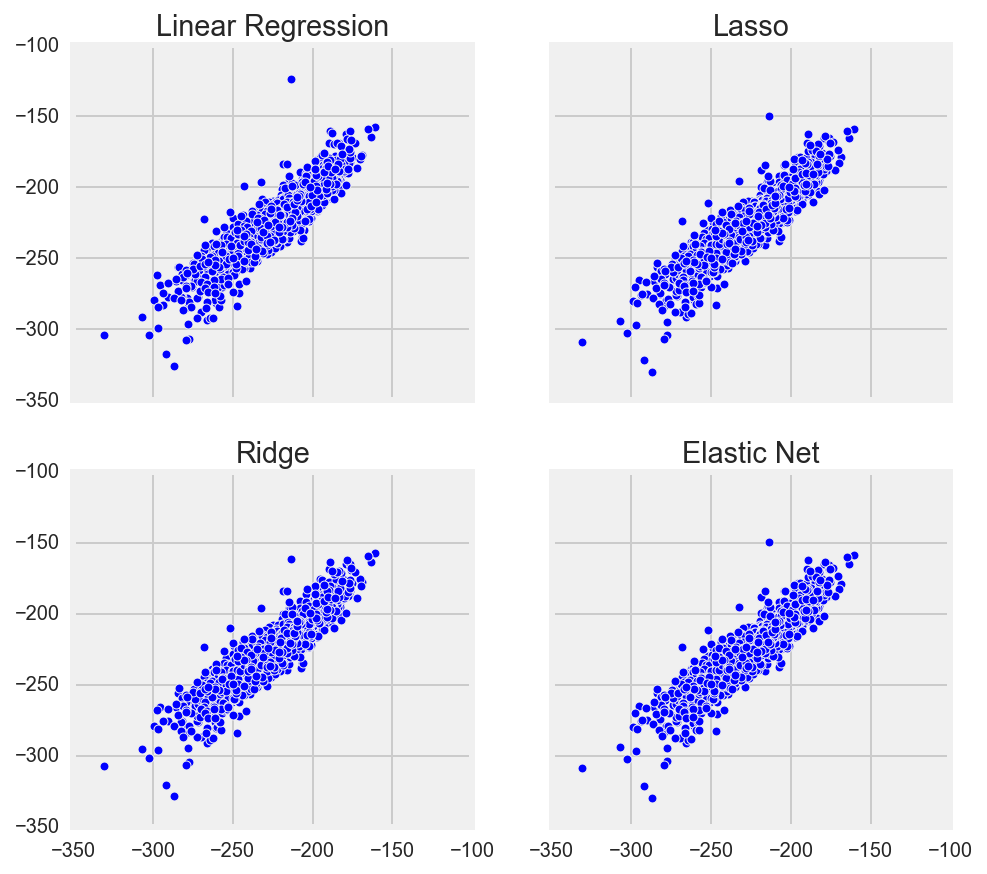


Clutch Rank
R-squared - LinReg 0.53359724298
R-squared - Lasso 0.527240913982
R-squared - Ridge 0.532121688611
R-squared - ElasticNet 0.527240913982


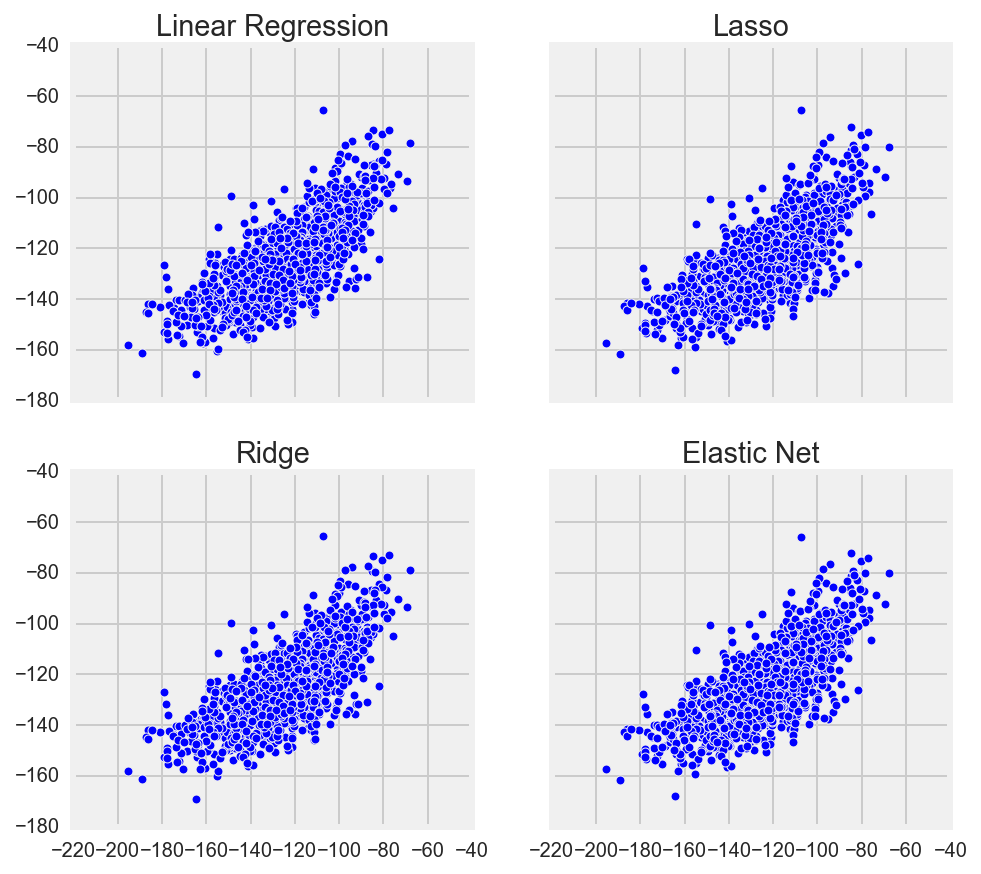


FP Mean
R-squared - LinReg 0.994410794954
R-squared - Lasso 0.994117562588
R-squared - Ridge 0.994412737702
R-squared - ElasticNet 0.994117562588


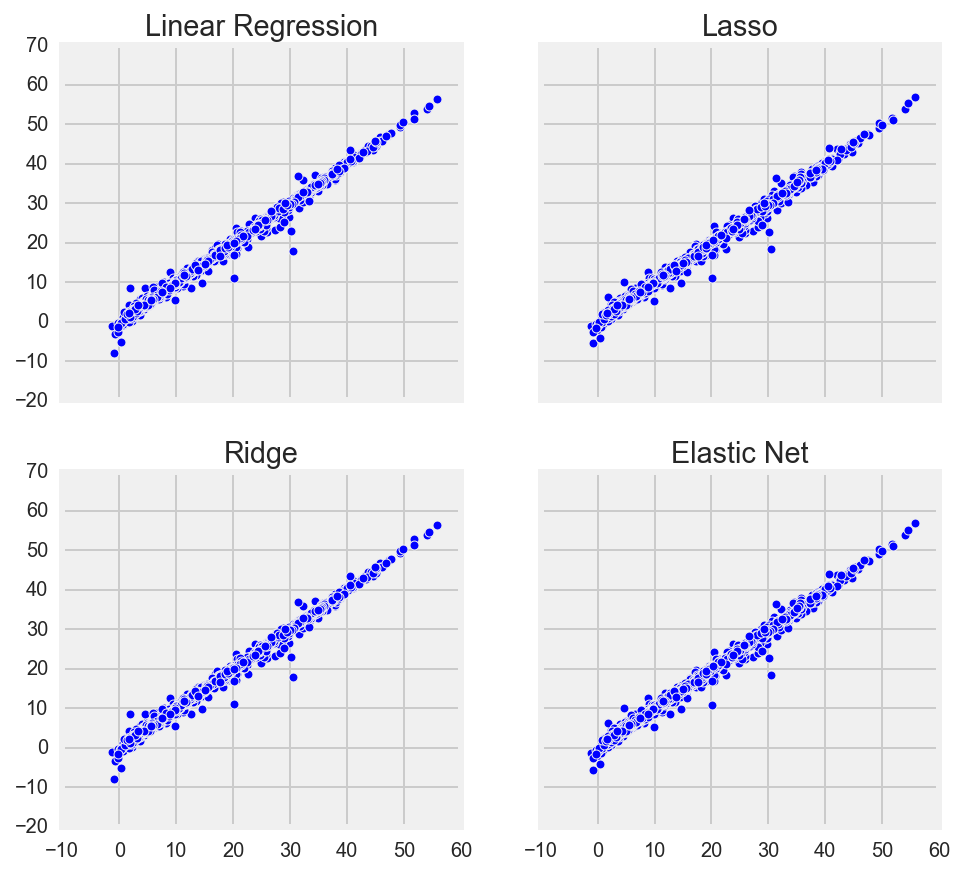


FP STD
R-squared - LinReg 0.748584480359
R-squared - Lasso 0.753326738937
R-squared - Ridge 0.749074347637
R-squared - ElasticNet 0.753326738937


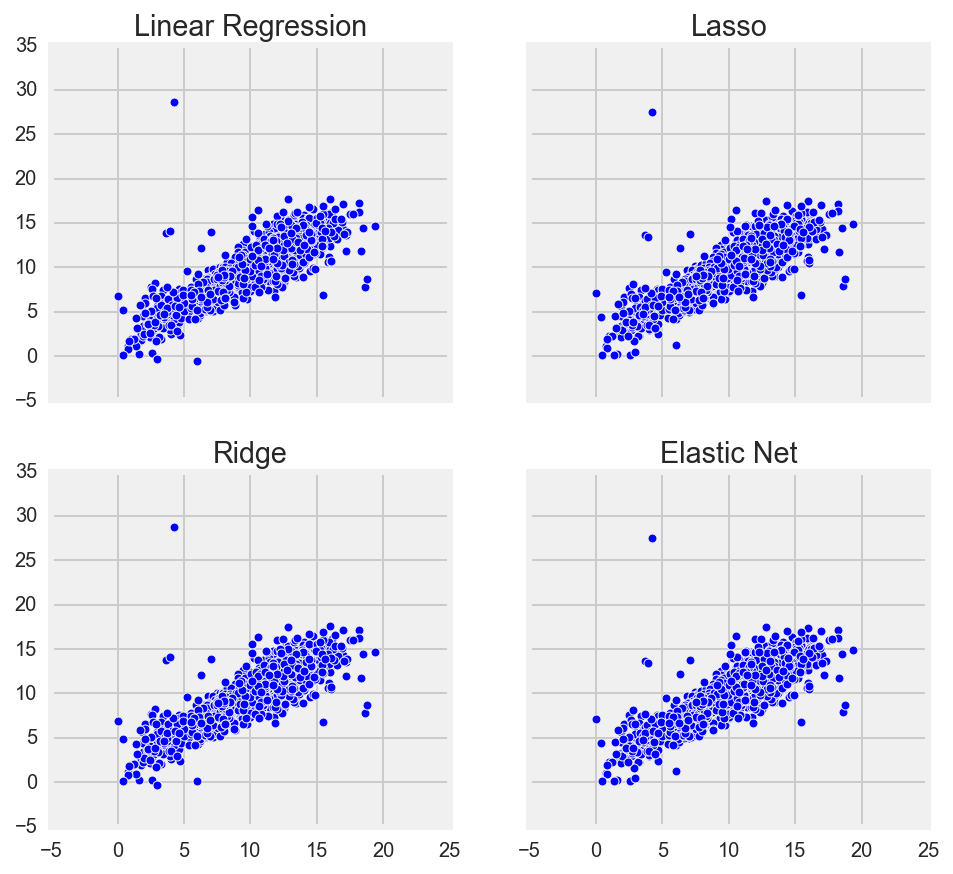


FP Var
R-squared - LinReg 0.743490524502
R-squared - Lasso 0.743511282812
R-squared - Ridge 0.744064971452
R-squared - ElasticNet 0.743511282812


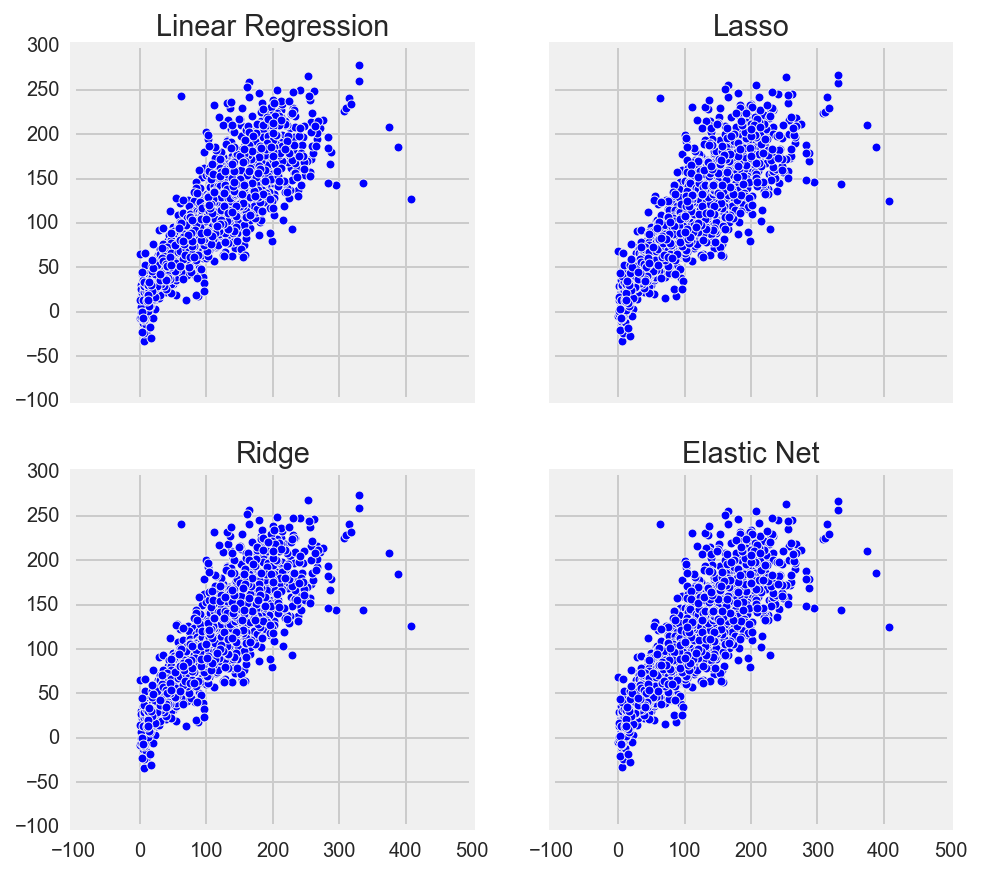

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'Agg Rank'
print 'R-squared - LinReg', r2_score(testY_agg_n, prediction_linreg_agg)
print 'R-squared - Lasso', r2_score(testY_agg_n, prediction_lasso_agg)
print 'R-squared - Ridge', r2_score(testY_agg_n, prediction_ridge_agg)
print 'R-squared - ElasticNet', r2_score(testY_agg_n, prediction_en_agg)
ax1.scatter(testY_agg_n, prediction_linreg_agg)
ax2.scatter(testY_agg_n, prediction_lasso_agg)
ax3.scatter(testY_agg_n, prediction_ridge_agg)
ax4.scatter(testY_agg_n, prediction_en_agg)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'Clutch Rank'
print 'R-squared - LinReg', r2_score(testY_clutch_n, prediction_linreg_clutch)
print 'R-squared - Lasso', r2_score(testY_clutch_n, prediction_lasso_clutch)
print 'R-squared - Ridge', r2_score(testY_clutch_n, prediction_ridge_clutch)
print 'R-squared - ElasticNet', r2_score(testY_clutch_n, prediction_en_clutch)
ax1.scatter(testY_clutch_n, prediction_linreg_clutch)
ax2.scatter(testY_clutch_n, prediction_lasso_clutch)
ax3.scatter(testY_clutch_n, prediction_ridge_clutch)
ax4.scatter(testY_clutch_n, prediction_en_clutch)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP Mean'
print 'R-squared - LinReg', r2_score(testY_fp_mean_n, prediction_linreg_fp_mean)
print 'R-squared - Lasso', r2_score(testY_fp_mean_n, prediction_lasso_fp_mean)
print 'R-squared - Ridge', r2_score(testY_fp_mean_n, prediction_ridge_fp_mean)
print 'R-squared - ElasticNet', r2_score(testY_fp_mean_n, prediction_en_fp_mean)
ax1.scatter(testY_fp_mean_n, prediction_linreg_fp_mean)
ax2.scatter(testY_fp_mean_n, prediction_lasso_fp_mean)
ax3.scatter(testY_fp_mean_n, prediction_ridge_fp_mean)
ax4.scatter(testY_fp_mean_n, prediction_en_fp_mean)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP STD'
print 'R-squared - LinReg', r2_score(testY_fp_std_n, prediction_linreg_fp_std)
print 'R-squared - Lasso', r2_score(testY_fp_std_n, prediction_lasso_fp_std)
print 'R-squared - Ridge', r2_score(testY_fp_std_n, prediction_ridge_fp_std)
print 'R-squared - ElasticNet', r2_score(testY_fp_std_n, prediction_en_fp_std)
ax1.scatter(testY_fp_std_n, prediction_linreg_fp_std)
ax2.scatter(testY_fp_std_n, prediction_lasso_fp_std)
ax3.scatter(testY_fp_std_n, prediction_ridge_fp_std)
ax4.scatter(testY_fp_std_n, prediction_en_fp_std)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP Var'
print 'R-squared - LinReg', r2_score(testY_fp_var_n, prediction_linreg_fp_var)
print 'R-squared - Lasso', r2_score(testY_fp_var_n, prediction_lasso_fp_var)
print 'R-squared - Ridge', r2_score(testY_fp_var_n, prediction_ridge_fp_var)
print 'R-squared - ElasticNet', r2_score(testY_fp_var_n, prediction_en_fp_var)
ax1.scatter(testY_fp_var_n, prediction_linreg_fp_var)
ax2.scatter(testY_fp_var_n, prediction_lasso_fp_var)
ax3.scatter(testY_fp_var_n, prediction_ridge_fp_var)
ax4.scatter(testY_fp_var_n, prediction_en_fp_var)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

In [44]:
linreg_agg_model_fi = pd.DataFrame({'features':X_agg.columns, 'coef':model_linreg_agg.best_estimator_.coef_})
linreg_clutch_model_fi = pd.DataFrame({'features':X_clutch.columns, 'coef':model_linreg_clutch.best_estimator_.coef_})
linreg_fp_mean_model_fi = pd.DataFrame({'features':X_fp_mean.columns, 'coef':model_linreg_fp_mean.best_estimator_.coef_})
linreg_fp_std_model_fi = pd.DataFrame({'features':X_fp_std.columns, 'coef':model_linreg_fp_std.best_estimator_.coef_})
linreg_fp_var_model_fi = pd.DataFrame({'features':X_fp_var.columns, 'coef':model_linreg_fp_var.best_estimator_.coef_})
logreg_game_risk_model_fi = pd.DataFrame({'features':X_game_risk.columns, 'coef':model_logreg_game_risk.best_estimator_.coef_[1]})

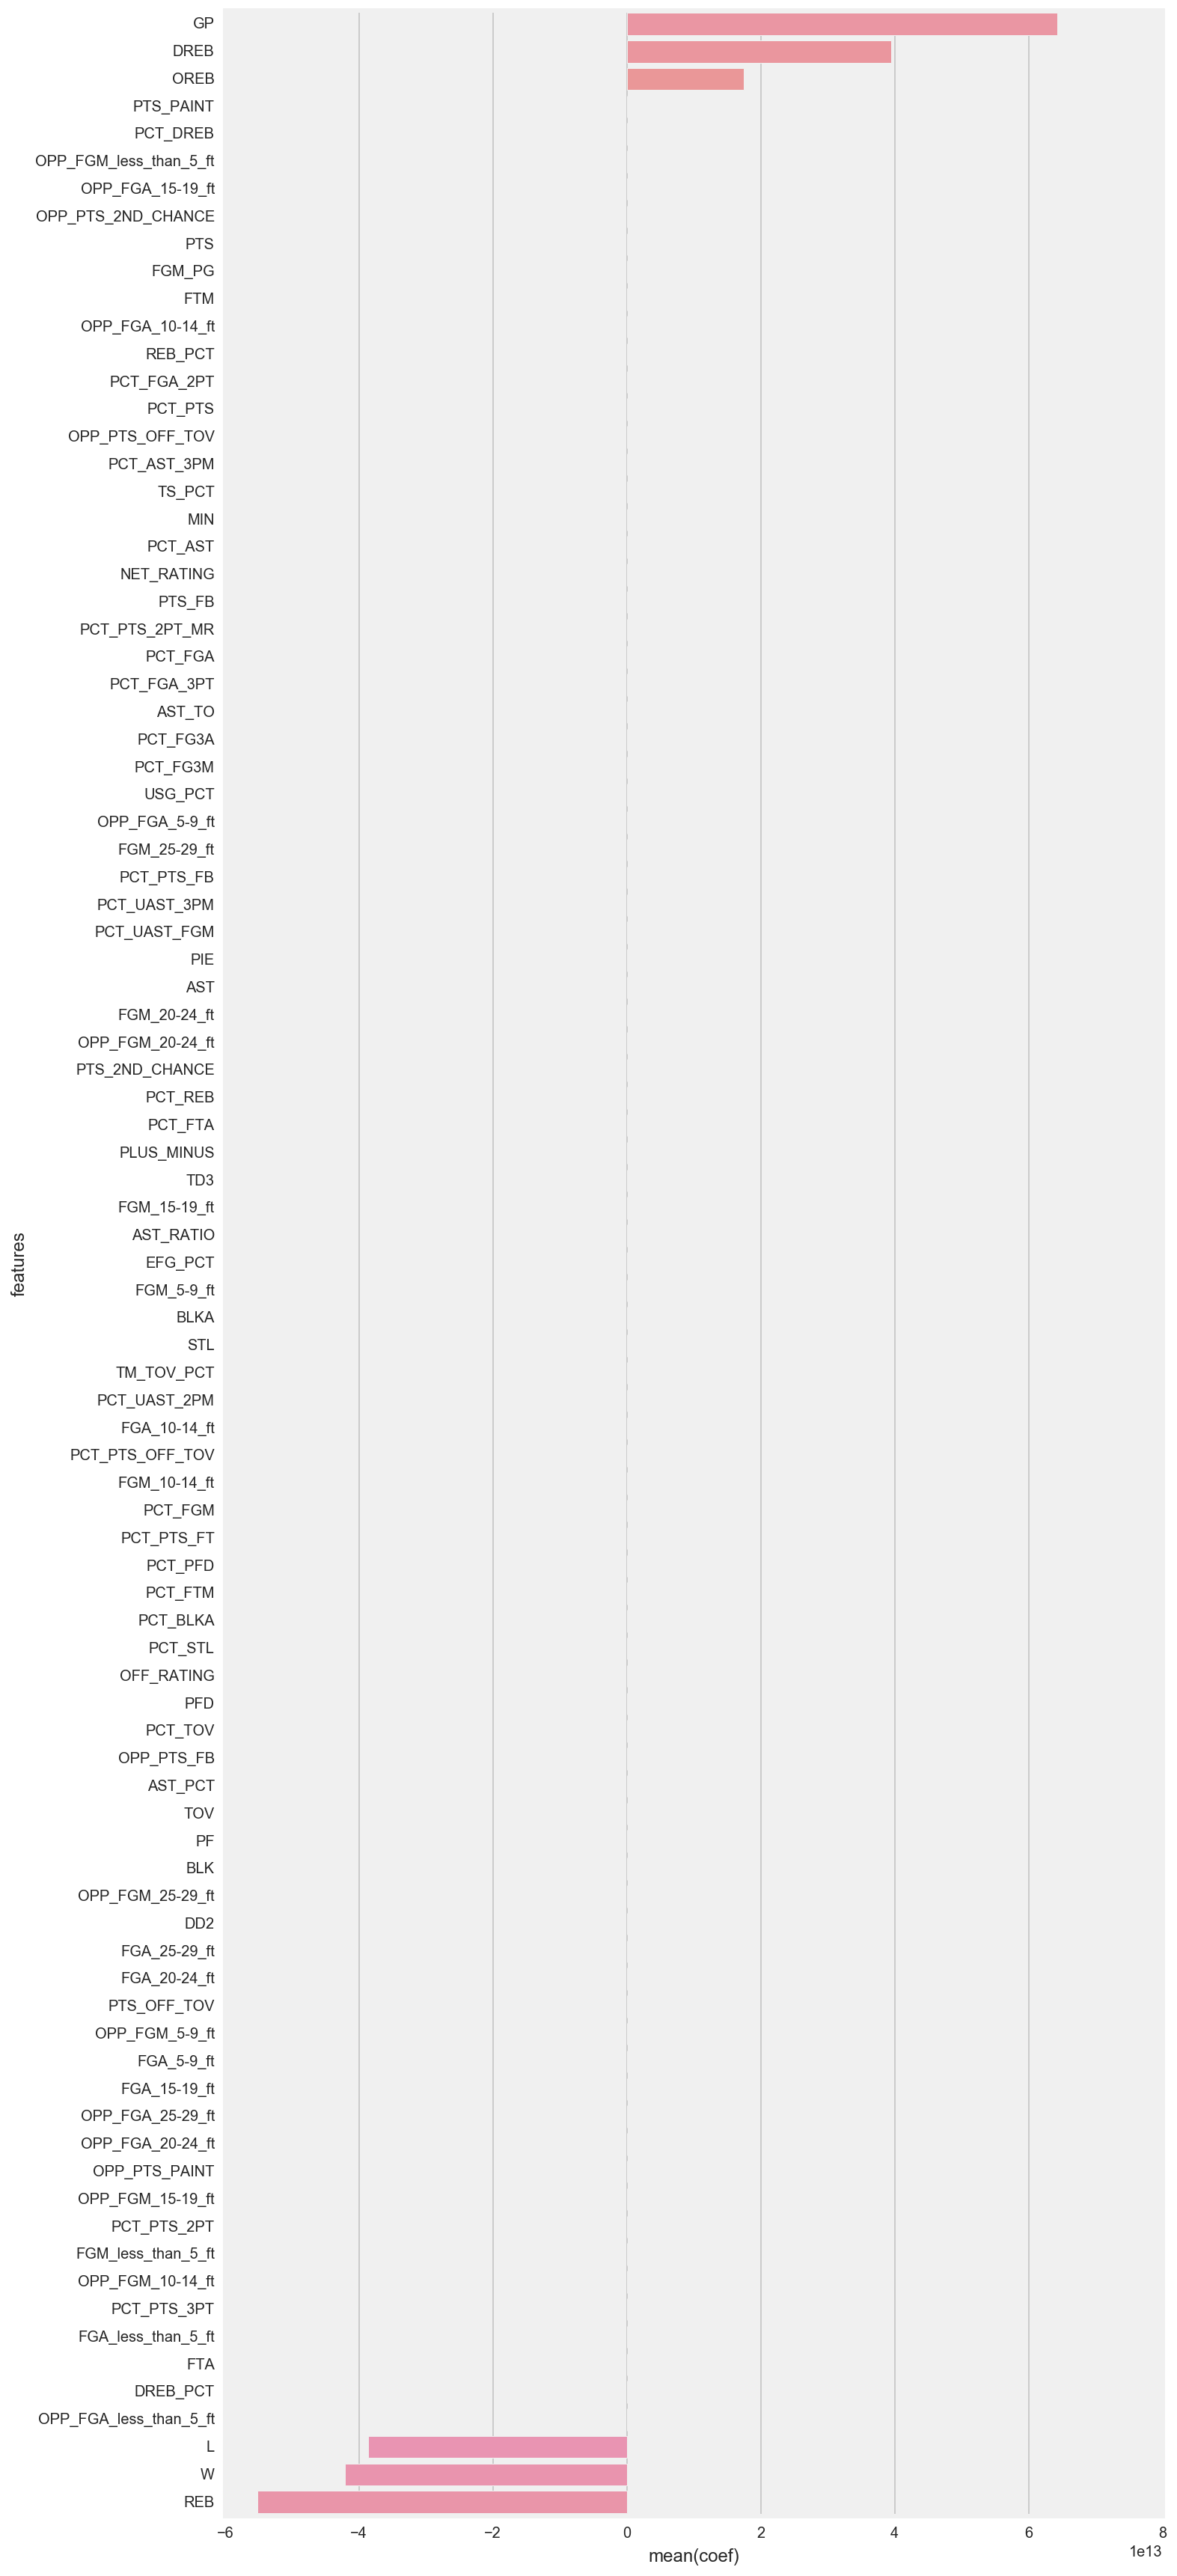

In [45]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=linreg_agg_model_fi.sort_values('coef', ascending=False), orient='h')

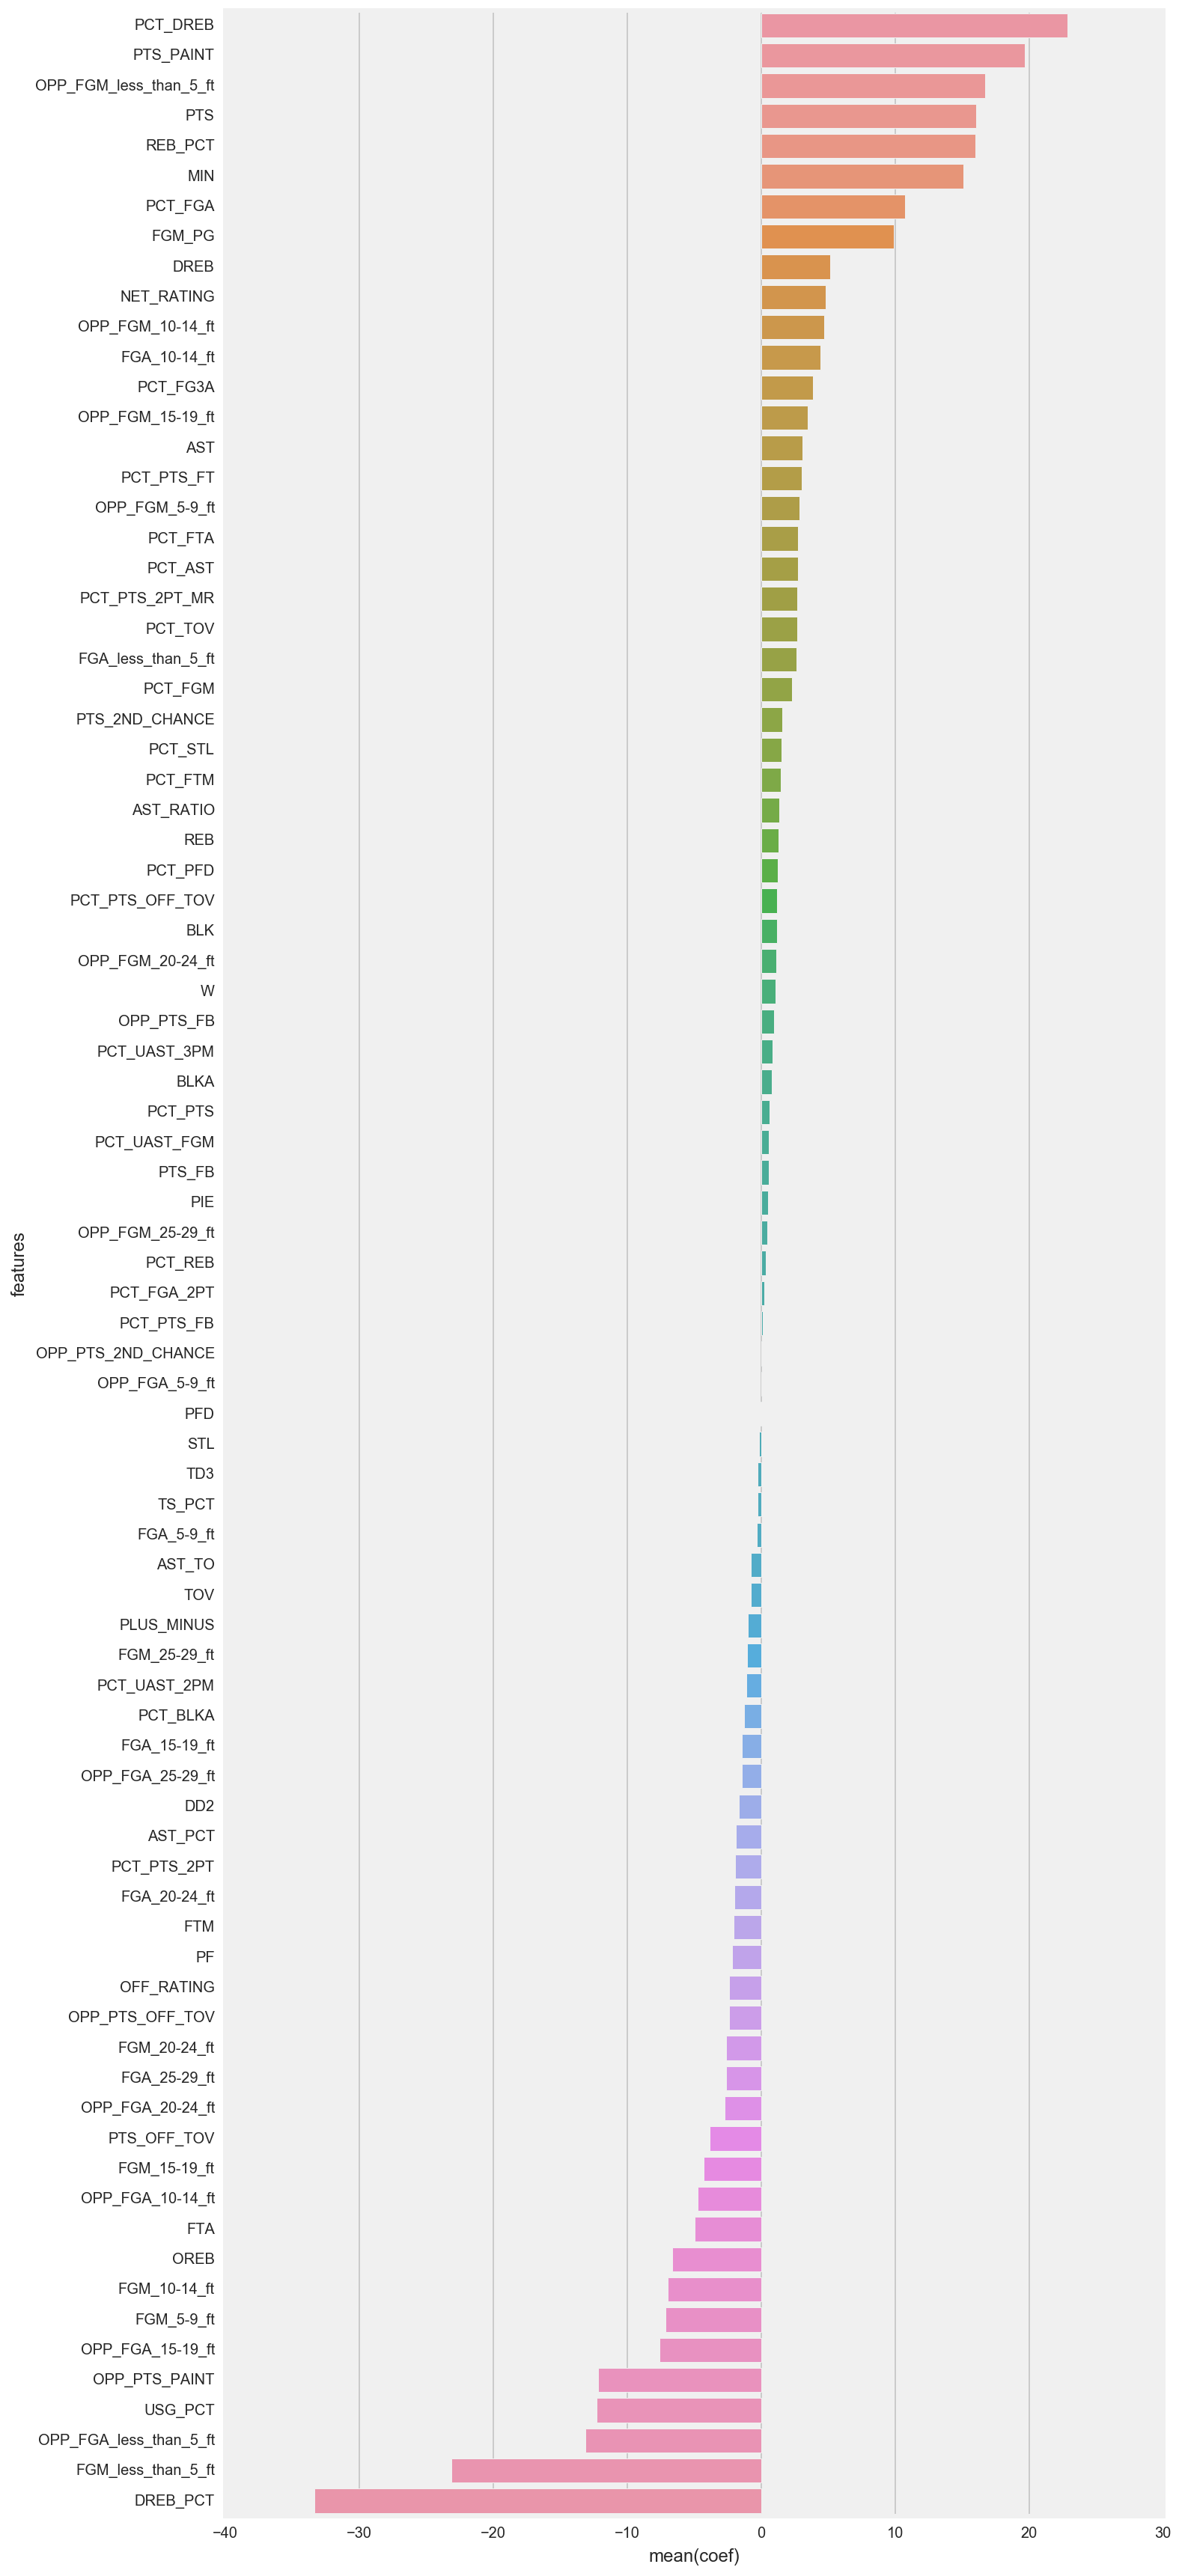

In [46]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=linreg_clutch_model_fi.sort_values('coef', ascending=False), orient='h')

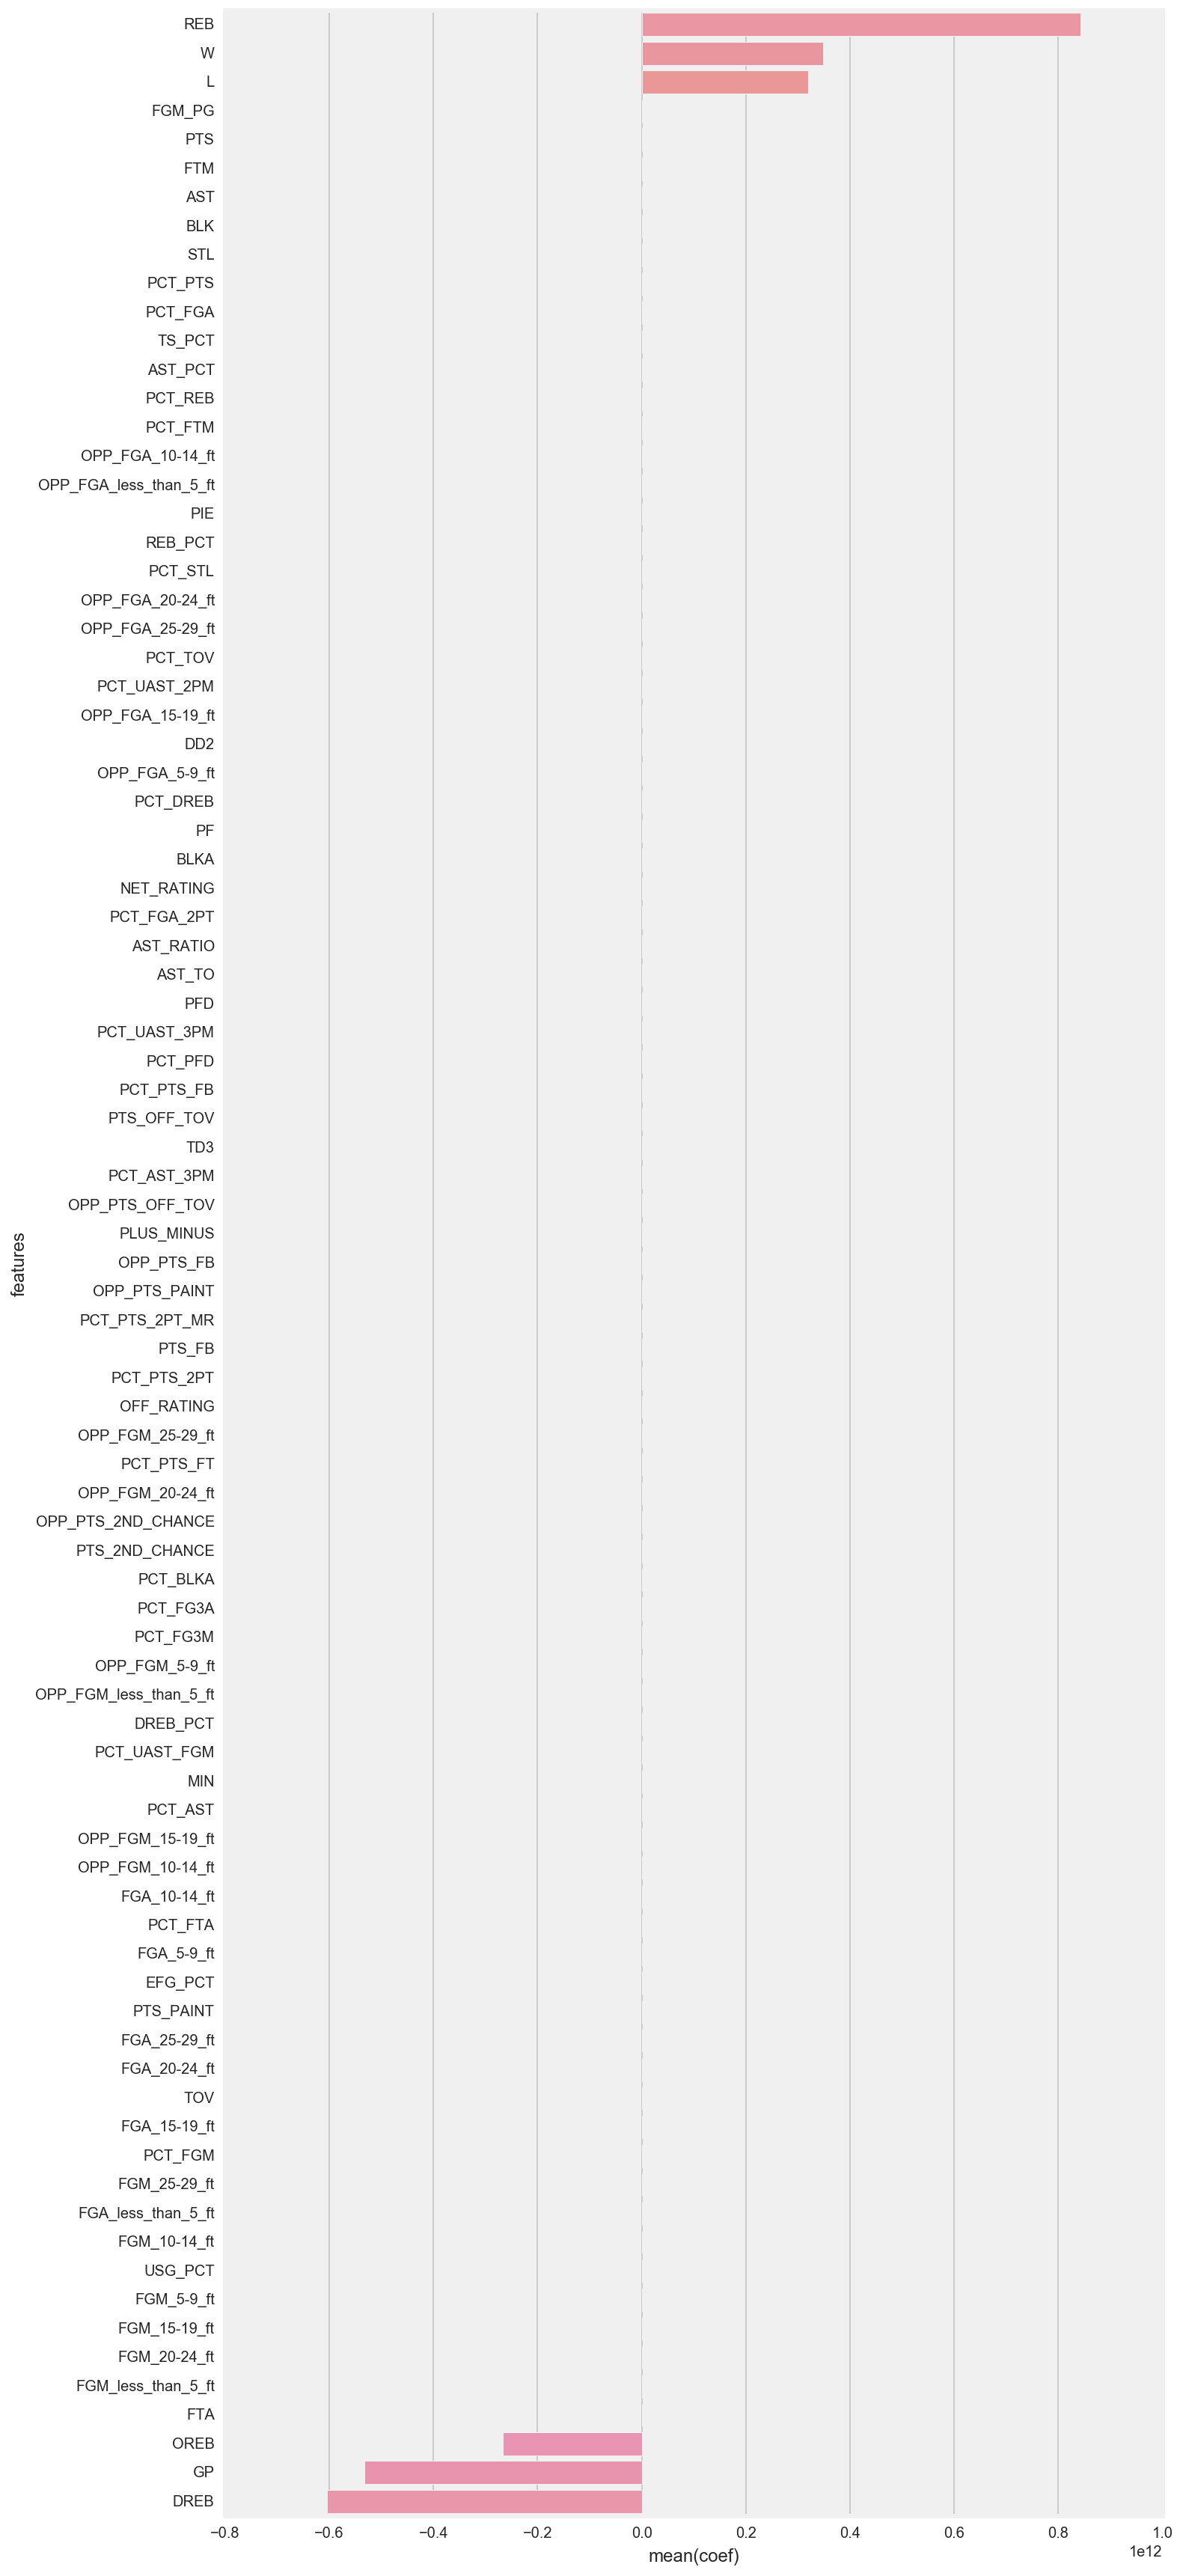

In [47]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=linreg_fp_mean_model_fi.sort_values('coef', ascending=False), orient='h')

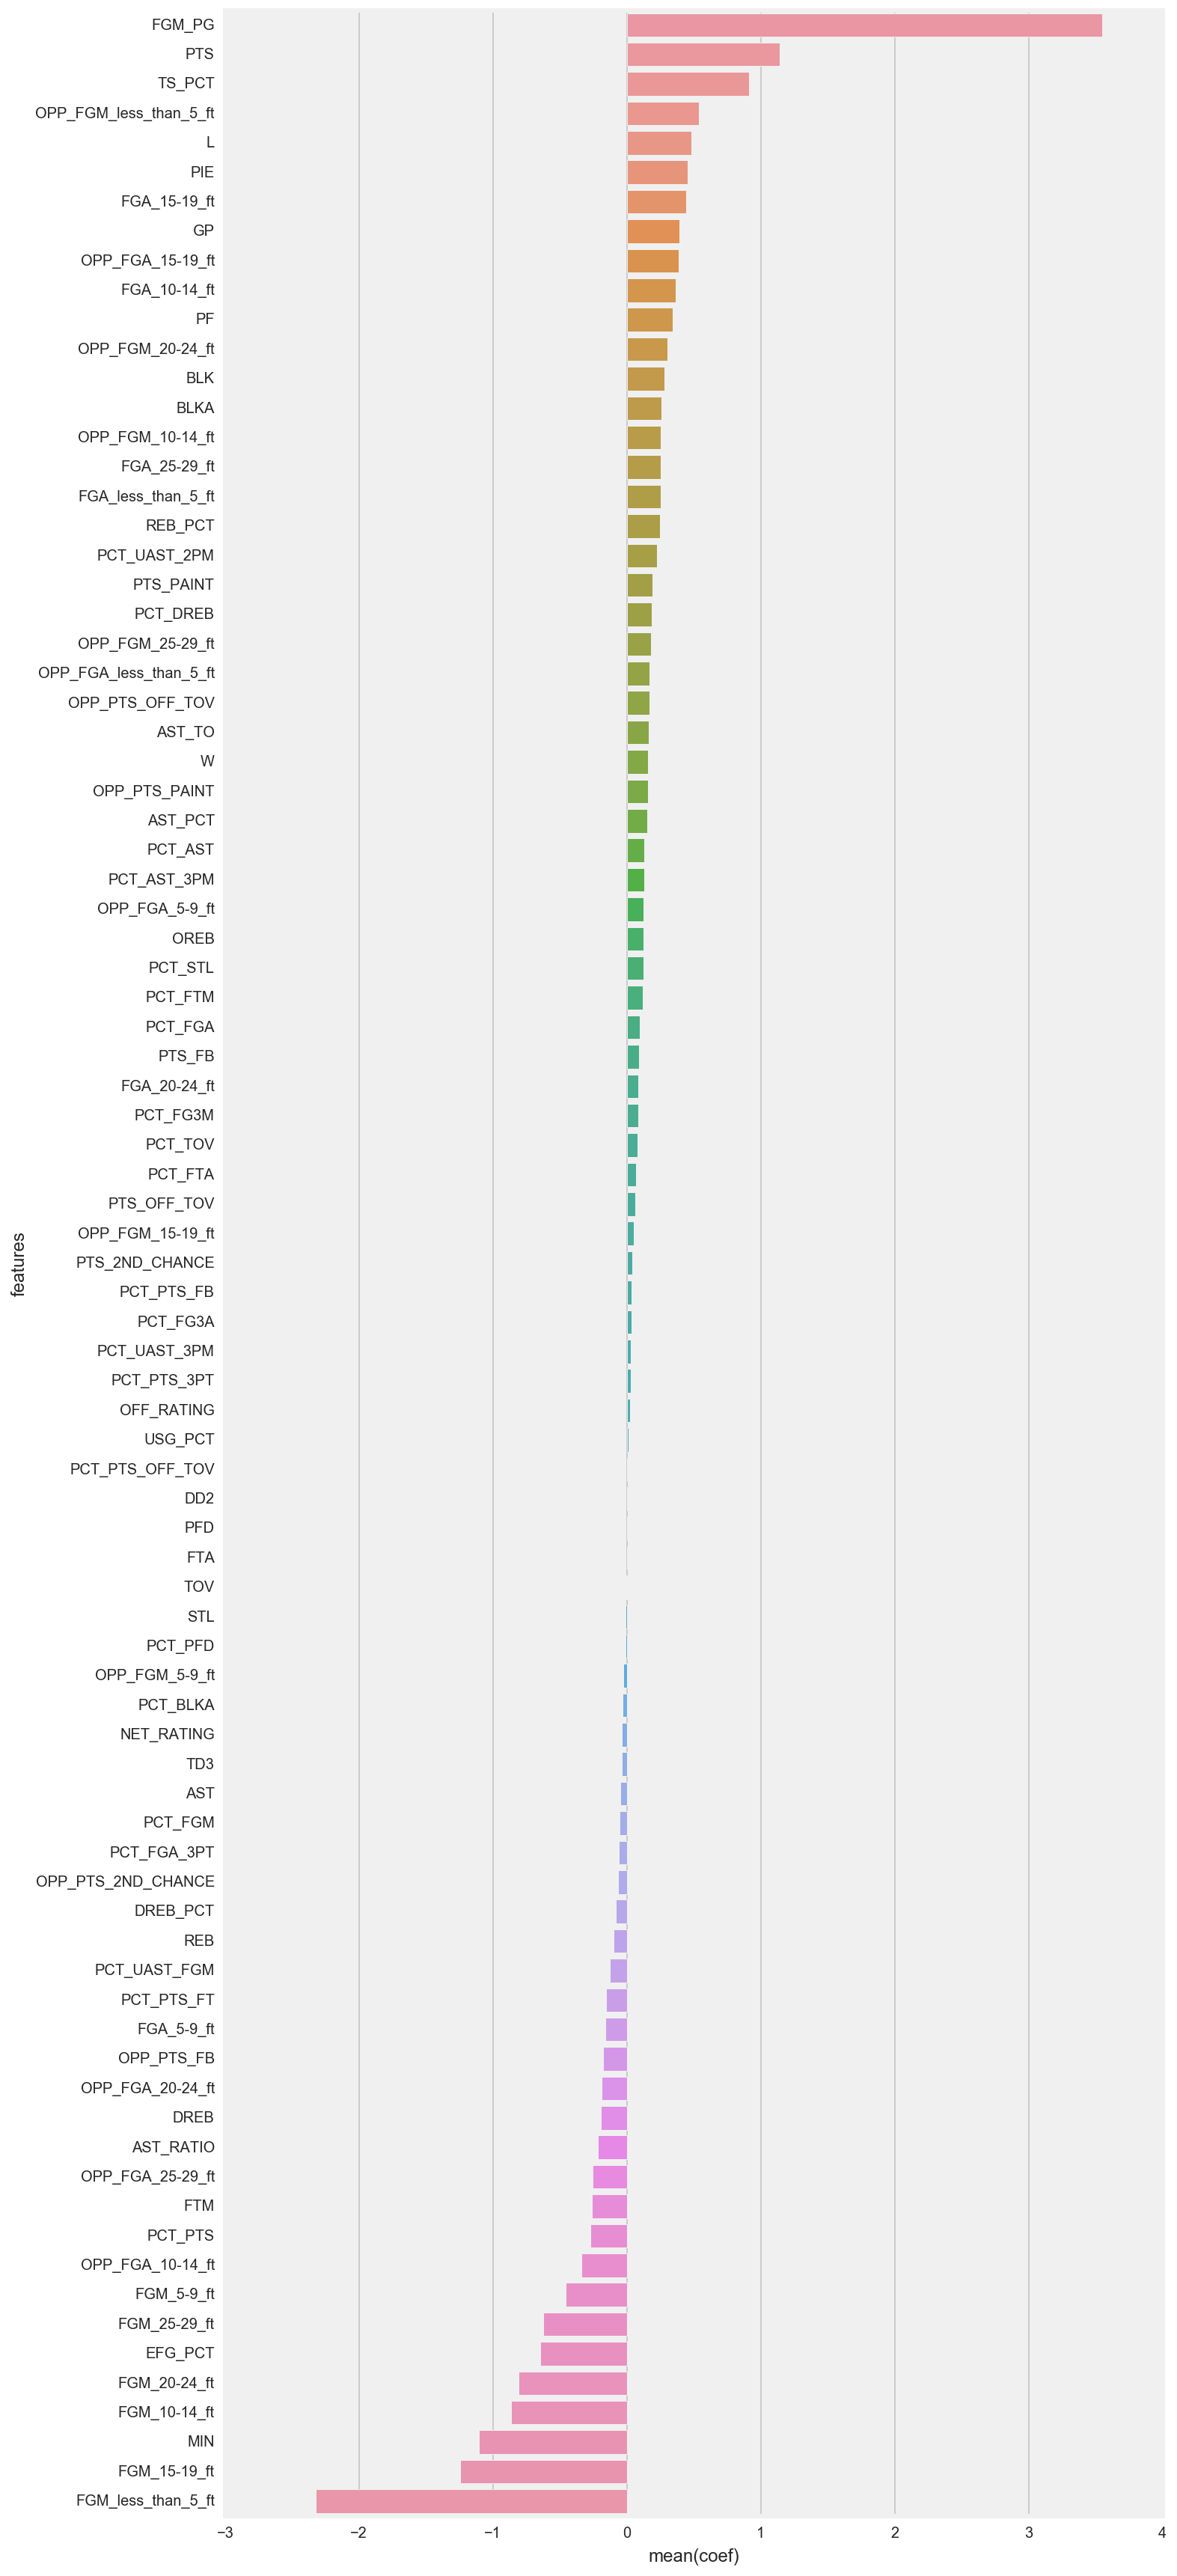

In [48]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=linreg_fp_std_model_fi.sort_values('coef', ascending=False), orient='h')

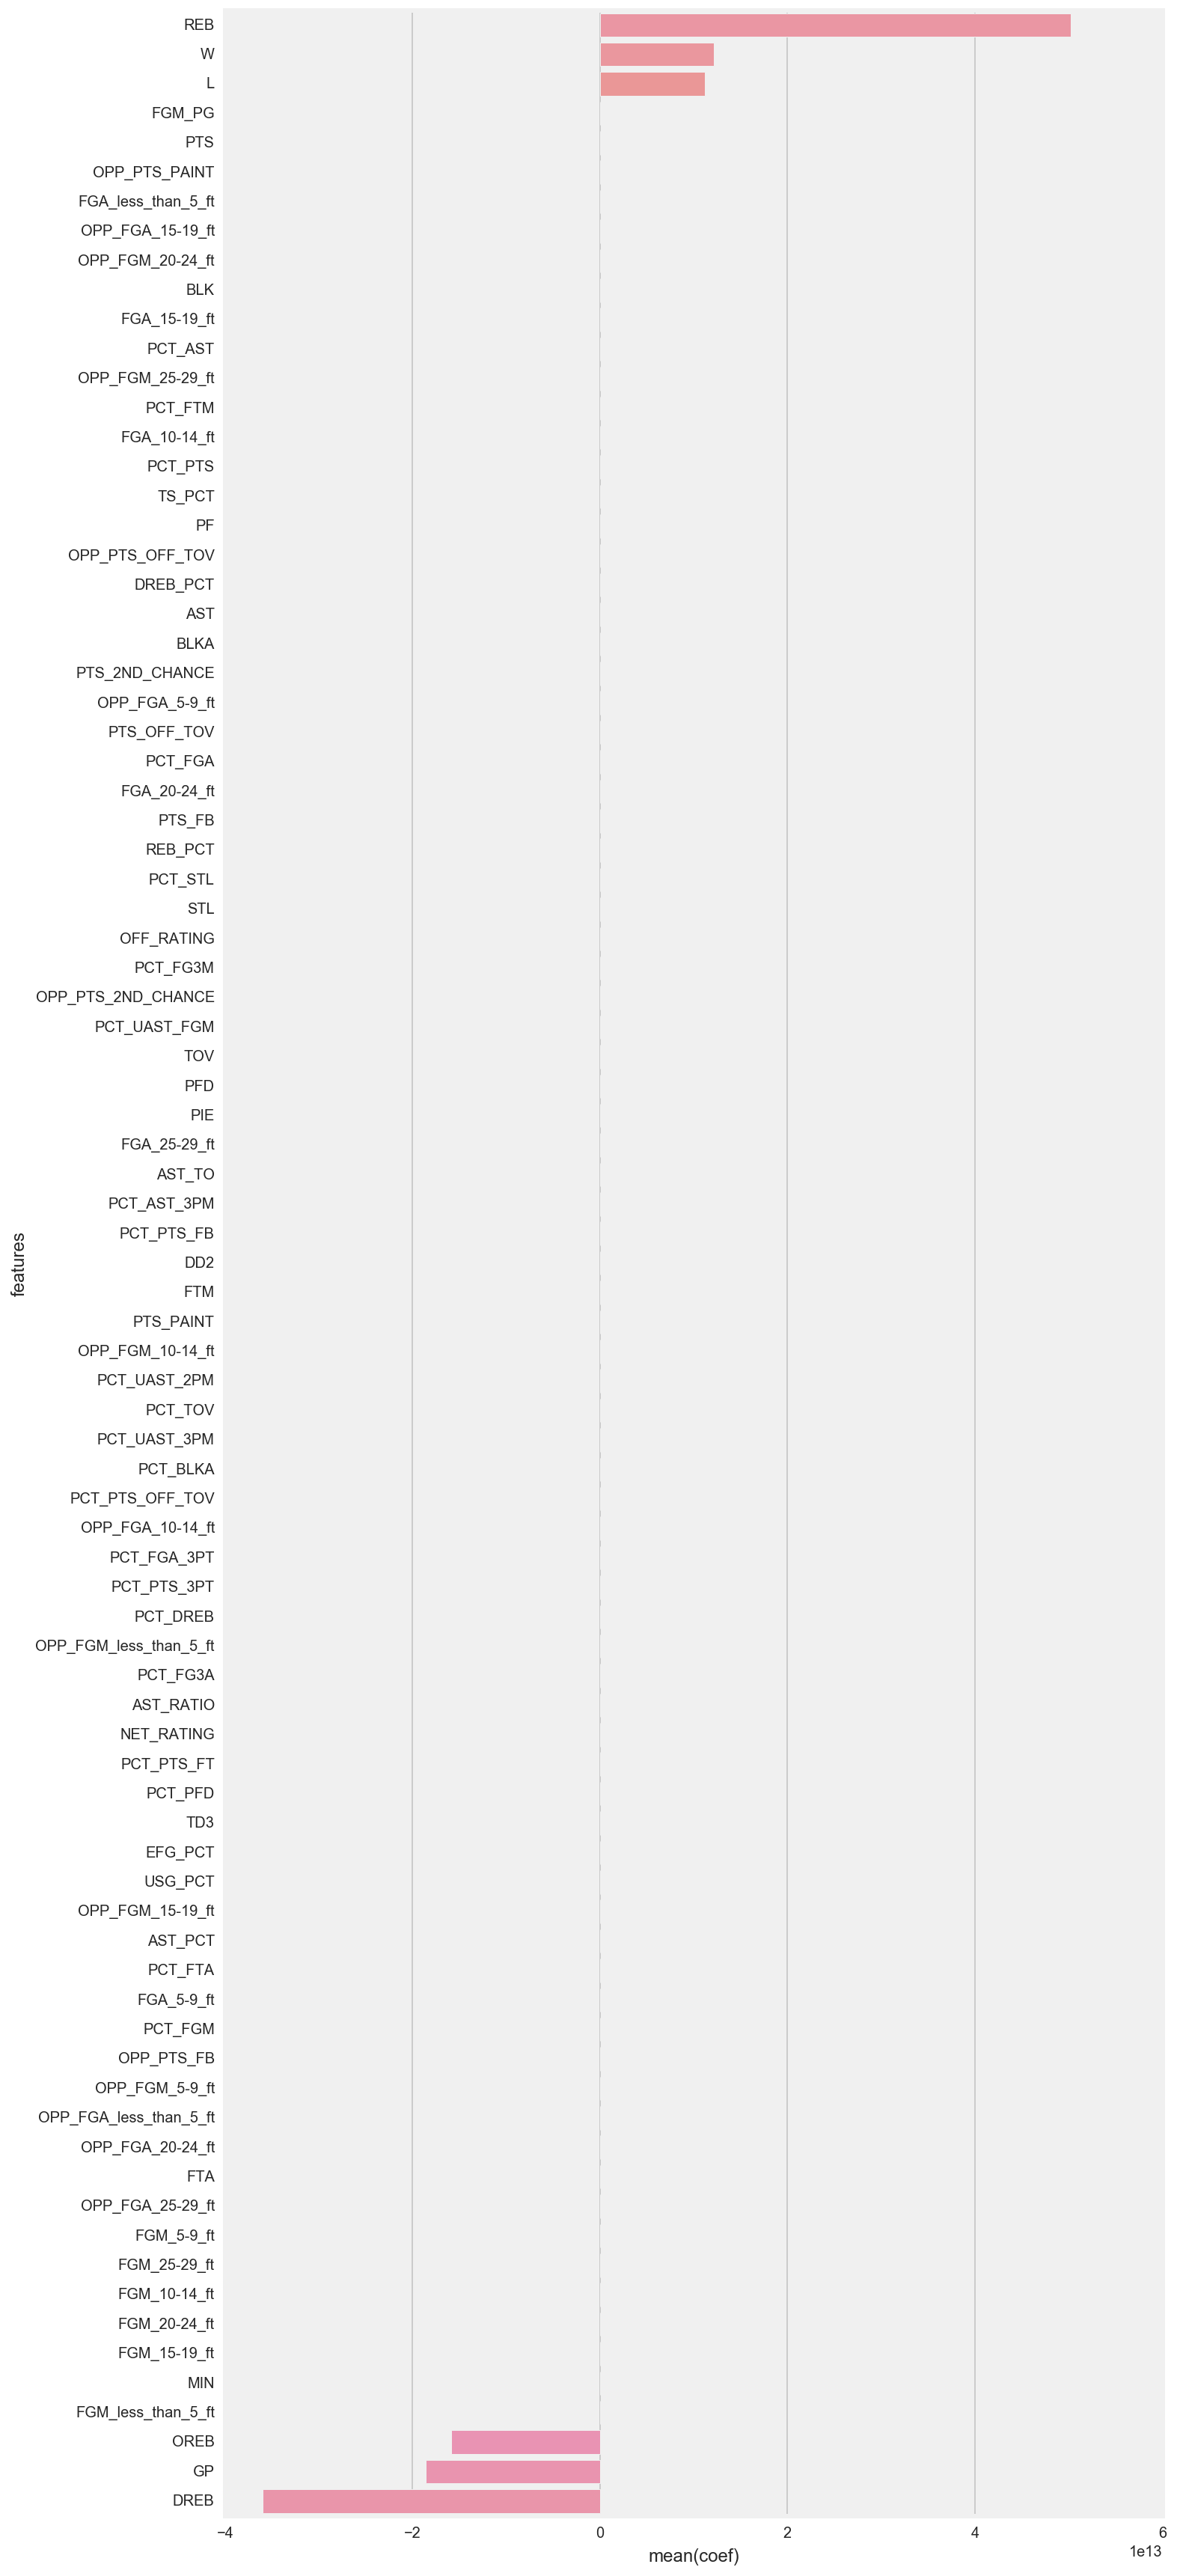

In [49]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=linreg_fp_var_model_fi.sort_values('coef', ascending=False), orient='h')

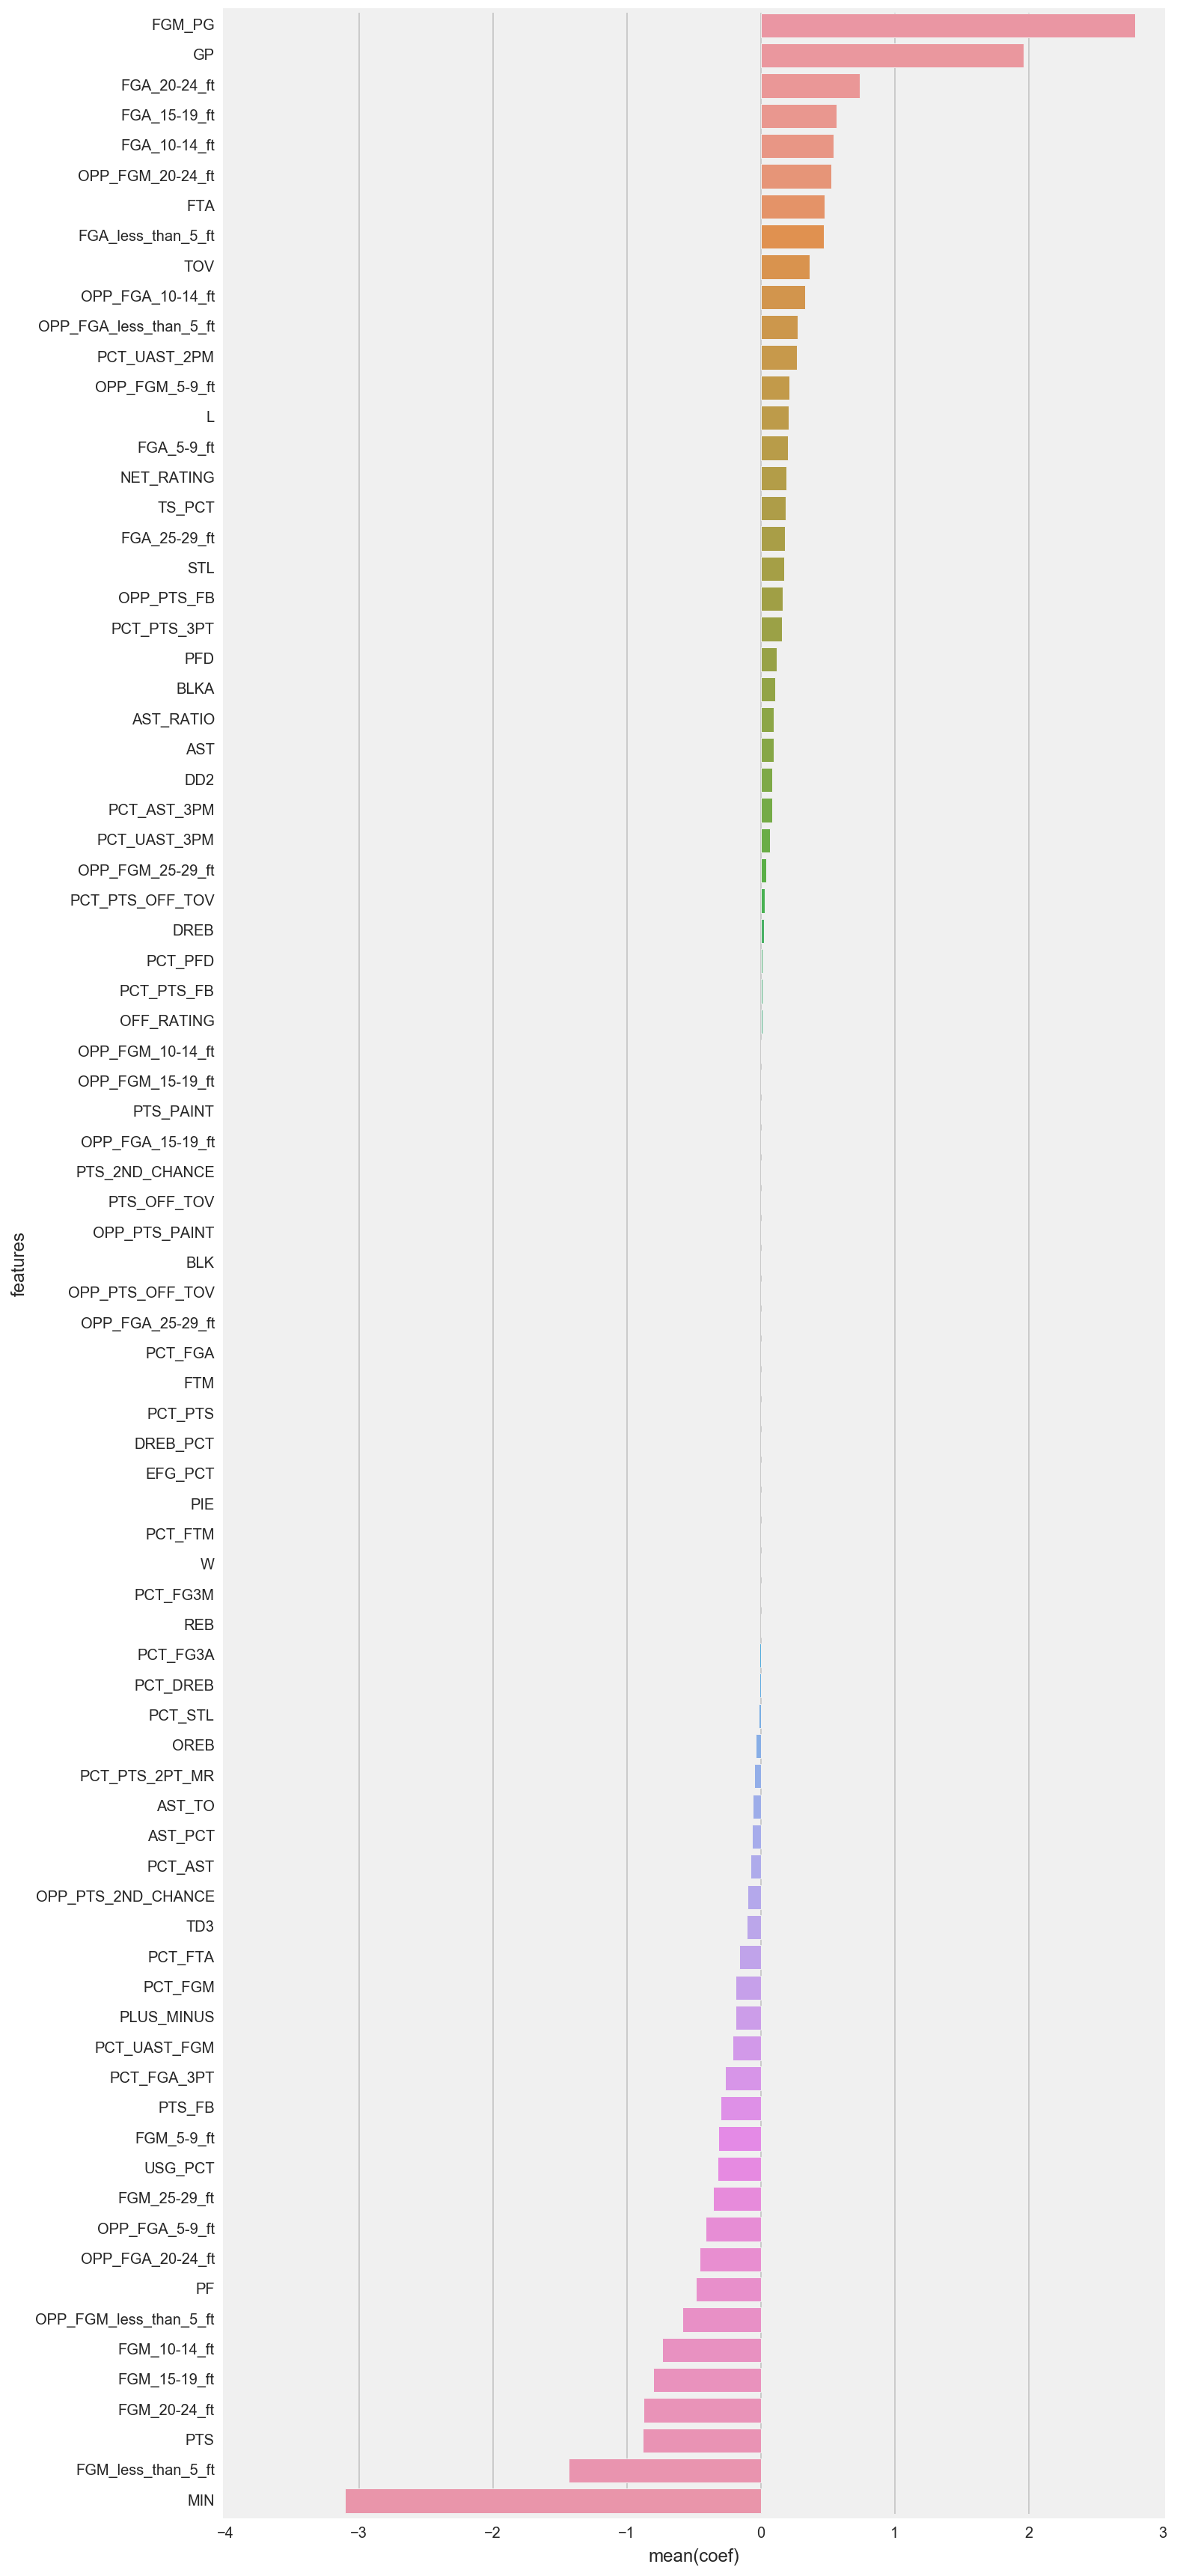

In [50]:
fig = plt.figure(figsize=(10,30))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=logreg_game_risk_model_fi.sort_values('coef', ascending=False), orient='h')

In [51]:
agg_model_fi_h5 = linreg_agg_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
agg_model_fi_t5 = linreg_agg_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

clutch_model_fi_h5 = linreg_clutch_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
clutch_model_fi_t5 = linreg_clutch_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

game_risk_model_fi_h5 = logreg_game_risk_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
game_risk_model_fi_t5 = logreg_game_risk_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

fp_mean_model_fi_h5 = linreg_fp_mean_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
fp_mean_model_fi_t5 = linreg_fp_mean_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

fp_std_model_fi_h5 = linreg_fp_std_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
fp_std_model_fi_t5 = linreg_fp_std_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

fp_var_model_fi_h5 = linreg_fp_var_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).head(5)
fp_var_model_fi_t5 = linreg_fp_var_model_fi.sort_values('coef', ascending=False).reset_index(drop=True).tail(5)

In [52]:
agg_model_fi_final = pd.concat([agg_model_fi_h5, agg_model_fi_t5])
clutch_model_fi_final = pd.concat([clutch_model_fi_h5, clutch_model_fi_t5])
game_risk_model_fi_final = pd.concat([game_risk_model_fi_h5, game_risk_model_fi_t5])
fp_mean_model_fi_final = pd.concat([fp_mean_model_fi_h5, agg_model_fi_t5])
fp_std_model_fi_final = pd.concat([fp_std_model_fi_h5, fp_std_model_fi_t5])
fp_var_model_fi_final = pd.concat([fp_var_model_fi_h5, fp_var_model_fi_t5])

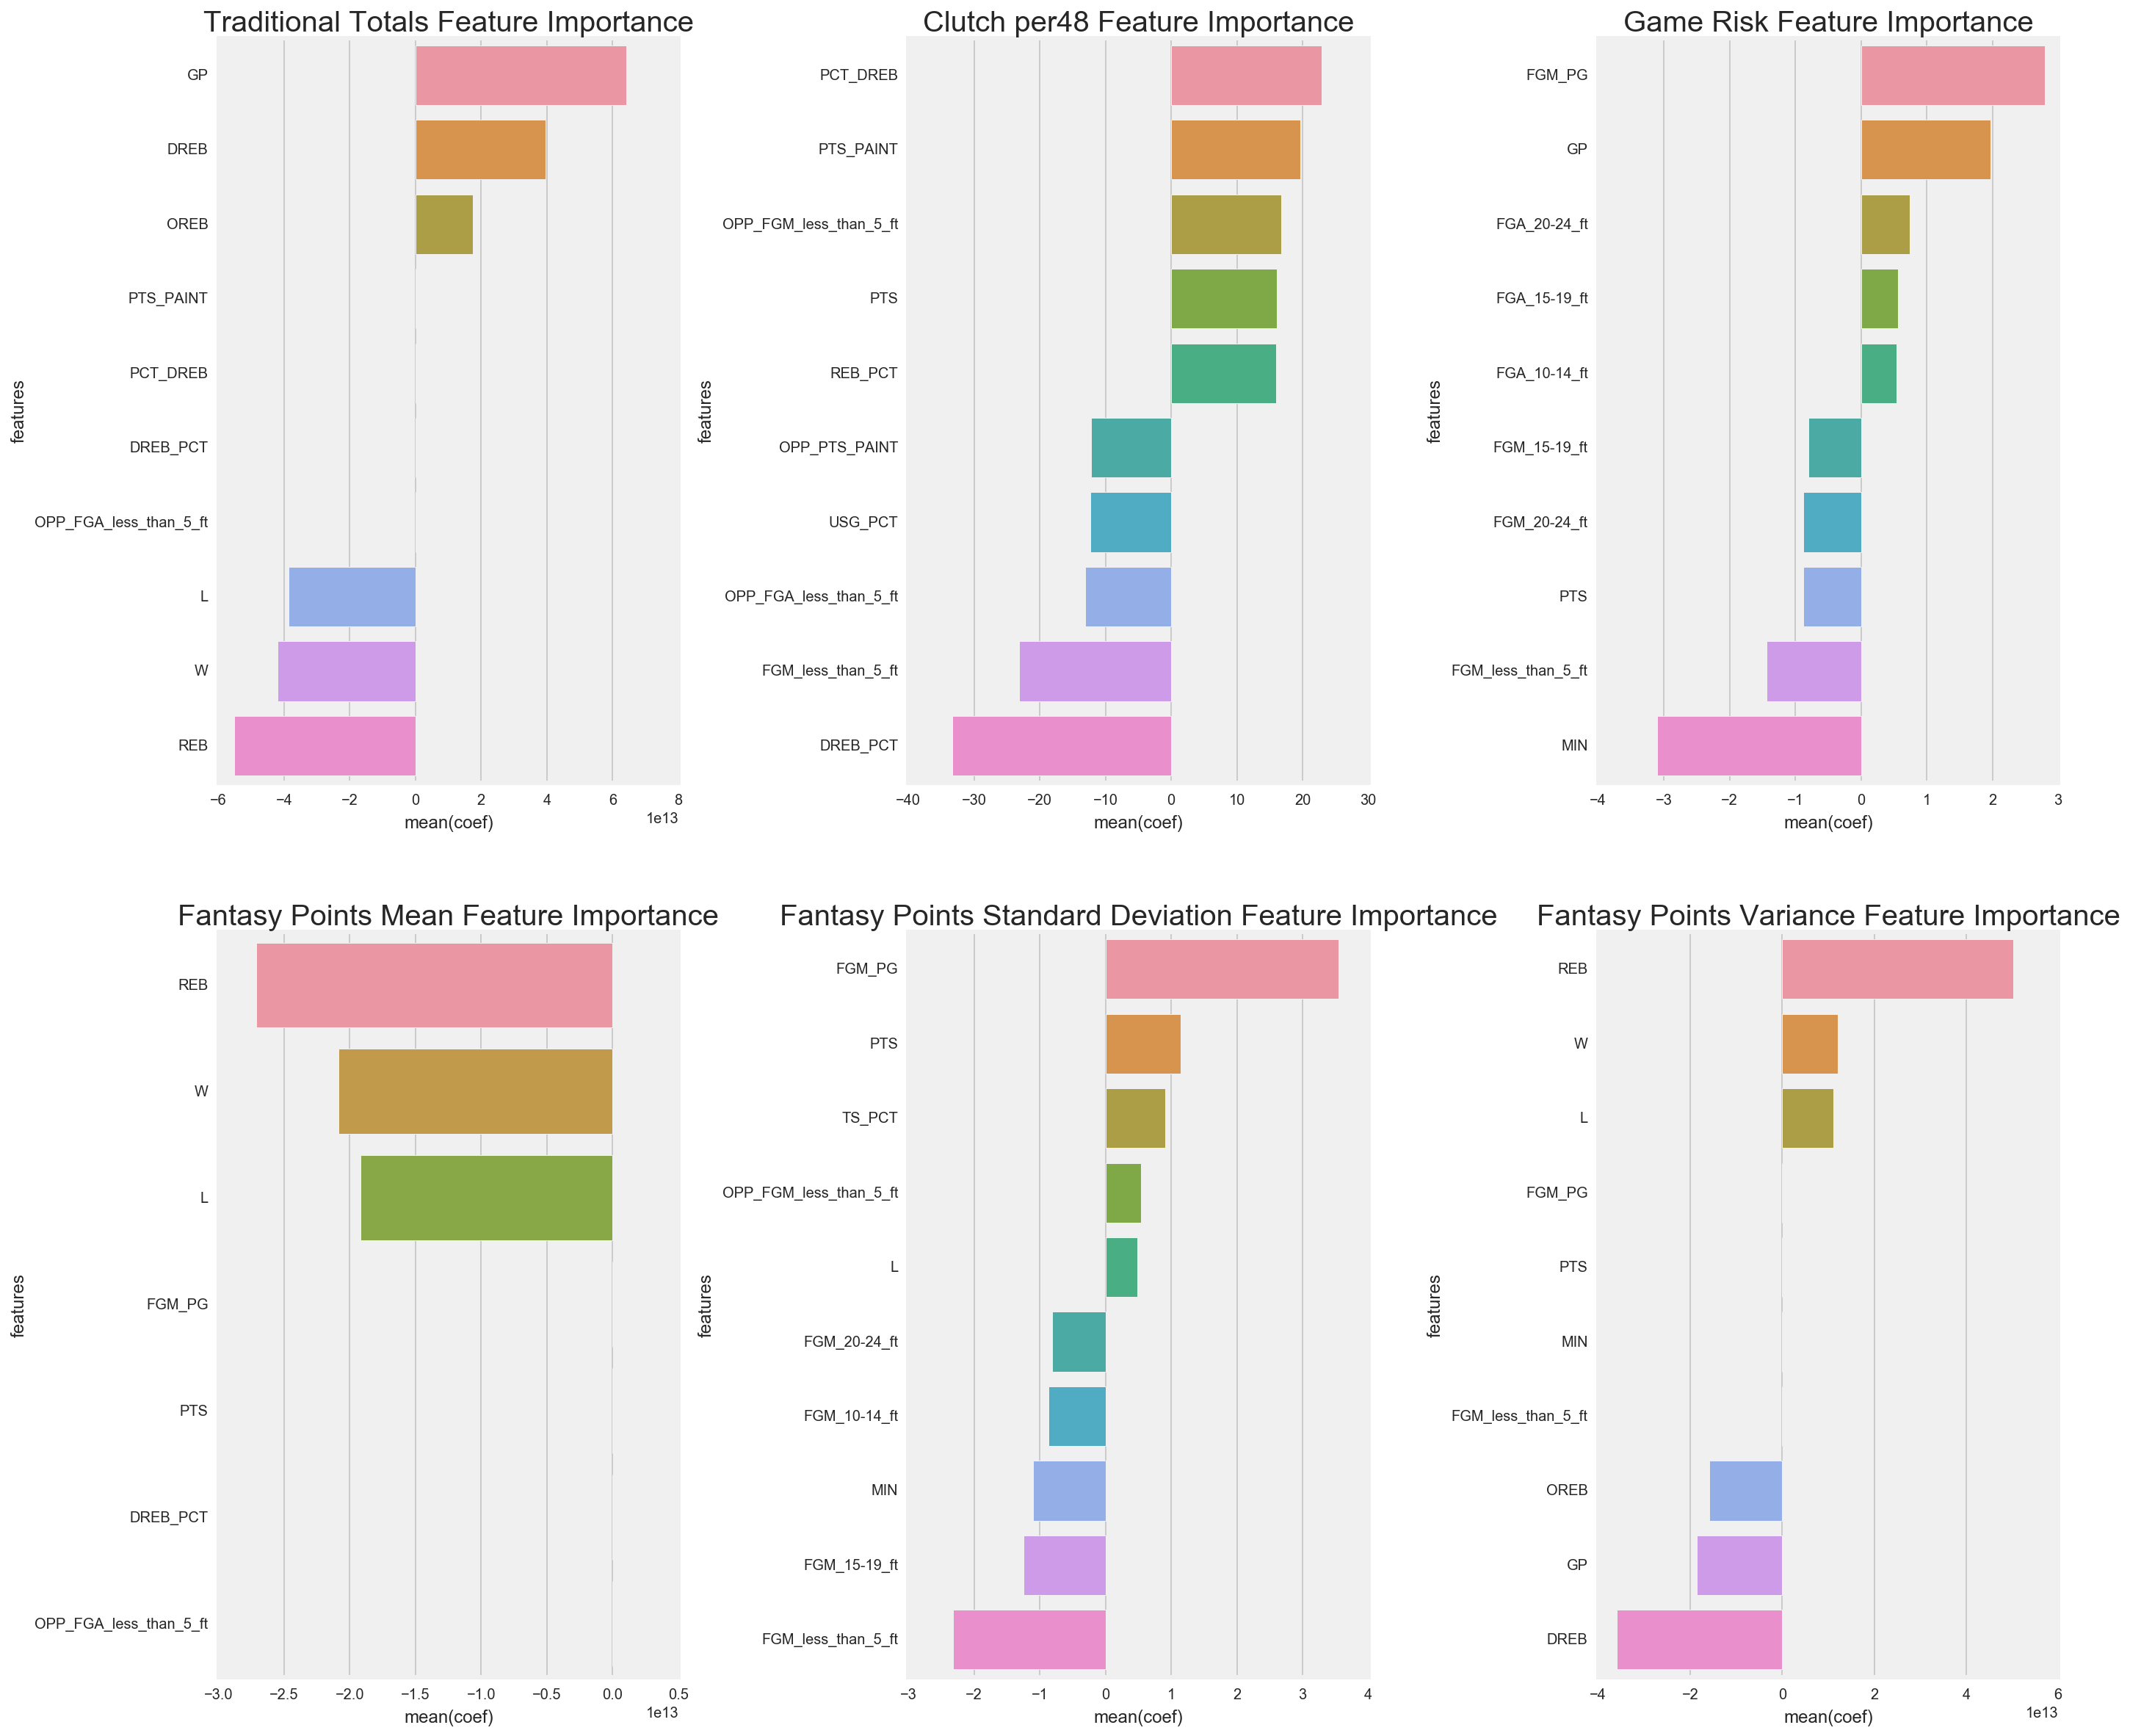

In [53]:
fig, ax = plt.subplots(figsize=(20,20), nrows=2, ncols=3)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

sns.barplot(y='features', x='coef', data=agg_model_fi_final.sort_values('coef', ascending=False), orient='h', ax=ax[0,0])
sns.barplot(y='features', x='coef', data=clutch_model_fi_final.sort_values('coef', ascending=False), orient='h', ax=ax[0,1])
sns.barplot(y='features', x='coef', data=game_risk_model_fi_final.sort_values('coef', ascending=False), orient='h', ax=ax[0,2])
sns.barplot(y='features', x='coef', data=fp_mean_model_fi_final.sort_values('coef', ascending=False), orient='h', ci=None, ax=ax[1,0])
sns.barplot(y='features', x='coef', data=fp_std_model_fi_final.sort_values('coef', ascending=False), orient='h', ax=ax[1,1])
sns.barplot(y='features', x='coef', data=fp_var_model_fi_final.sort_values('coef', ascending=False), orient='h', ax=ax[1,2])

ax[0,0].set_title('Traditional Totals Feature Importance', size=20)
ax[0,1].set_title('Clutch per48 Feature Importance', size=20)
ax[0,2].set_title('Game Risk Feature Importance', size=20)
ax[1,0].set_title('Fantasy Points Mean Feature Importance', size=20)
ax[1,1].set_title('Fantasy Points Standard Deviation Feature Importance', size=20)
ax[1,2].set_title('Fantasy Points Variance Feature Importance', size=20)

In [54]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[604  13   0   0]
 [ 40 331  76  10]
 [  2 114 112 209]
 [  0  44  31 655]]


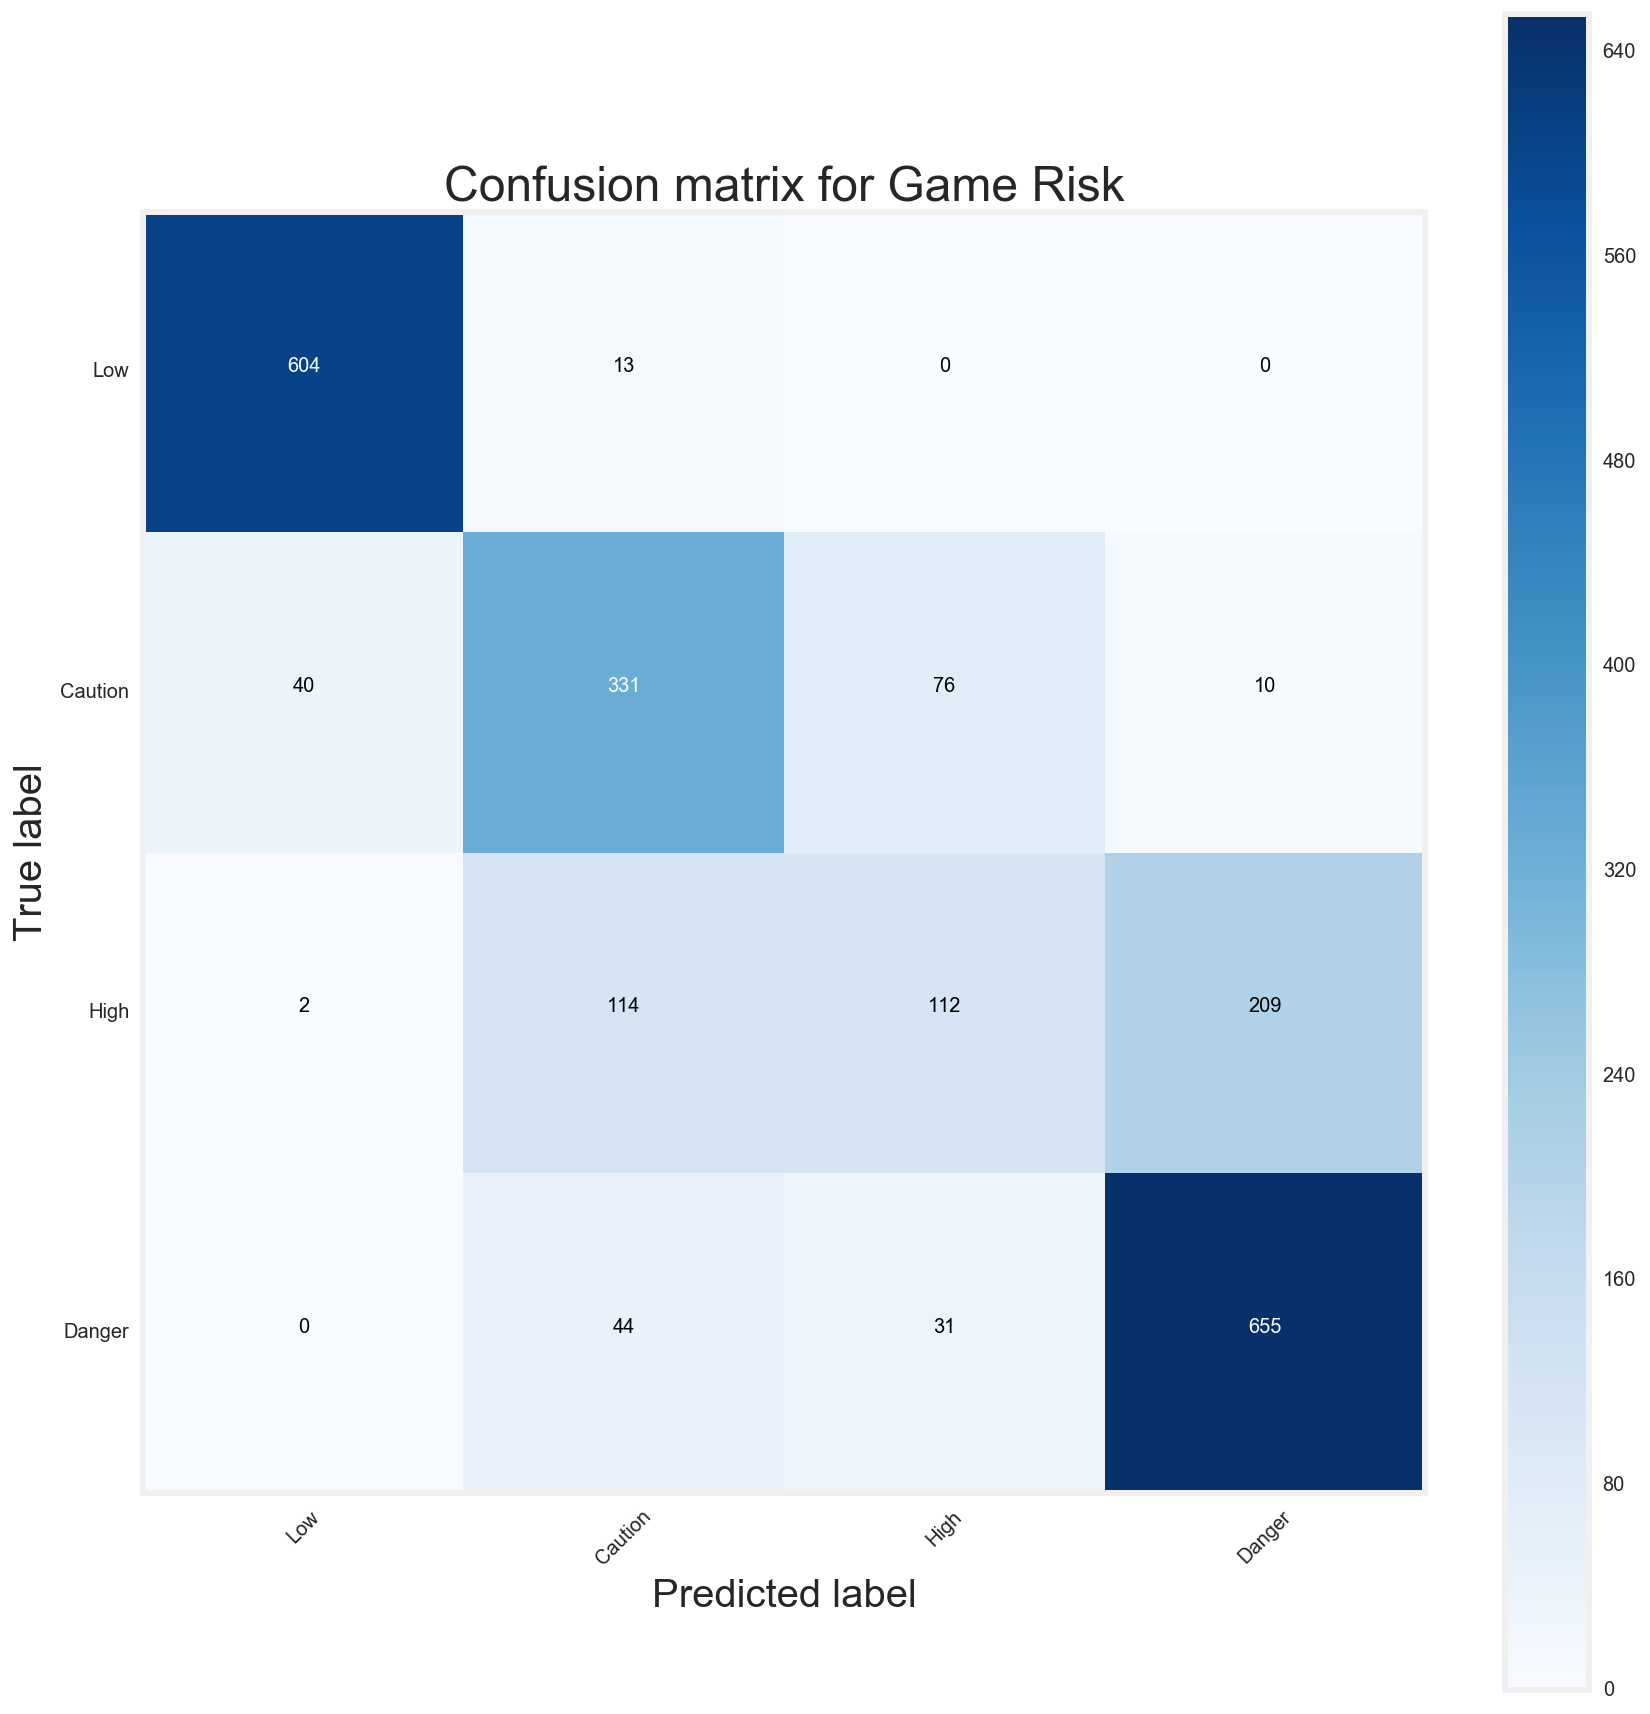

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels(['Low', 'Caution', 'High', 'Danger'])
    ax.set_yticklabels(['Low', 'Caution', 'High', 'Danger'])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

cnf_matrix = confusion_matrix(testY_game_risk_n, prediction_logreg_game_risk)
np.set_printoptions(precision=2)

class_names = (df_corr_game_risk.inv_game_risk.unique() * -1)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for Game Risk')

plt.show()

In [56]:
print classification_report(testY_game_risk_n, prediction_logreg_game_risk, target_names=["lowrisk", 'caution', 'high_risk', 'danger'])

             precision    recall  f1-score   support

    lowrisk       0.93      0.98      0.96       617
    caution       0.66      0.72      0.69       457
  high_risk       0.51      0.26      0.34       437
     danger       0.75      0.90      0.82       730

avg / total       0.74      0.76      0.74      2241



In [57]:
y_game_risk_roc = label_binarize((testY_game_risk_n * -1), classes=[0,1,2,3])
n_classes = y_game_risk_roc.shape[1]

Game Risk
R-squared - Logreg:  0.75948237394
R-squared - Lasso:  0.848706997689
R-squared - Ridge:  0.849116622557
R-squared - ElasticNet:  0.848706997689


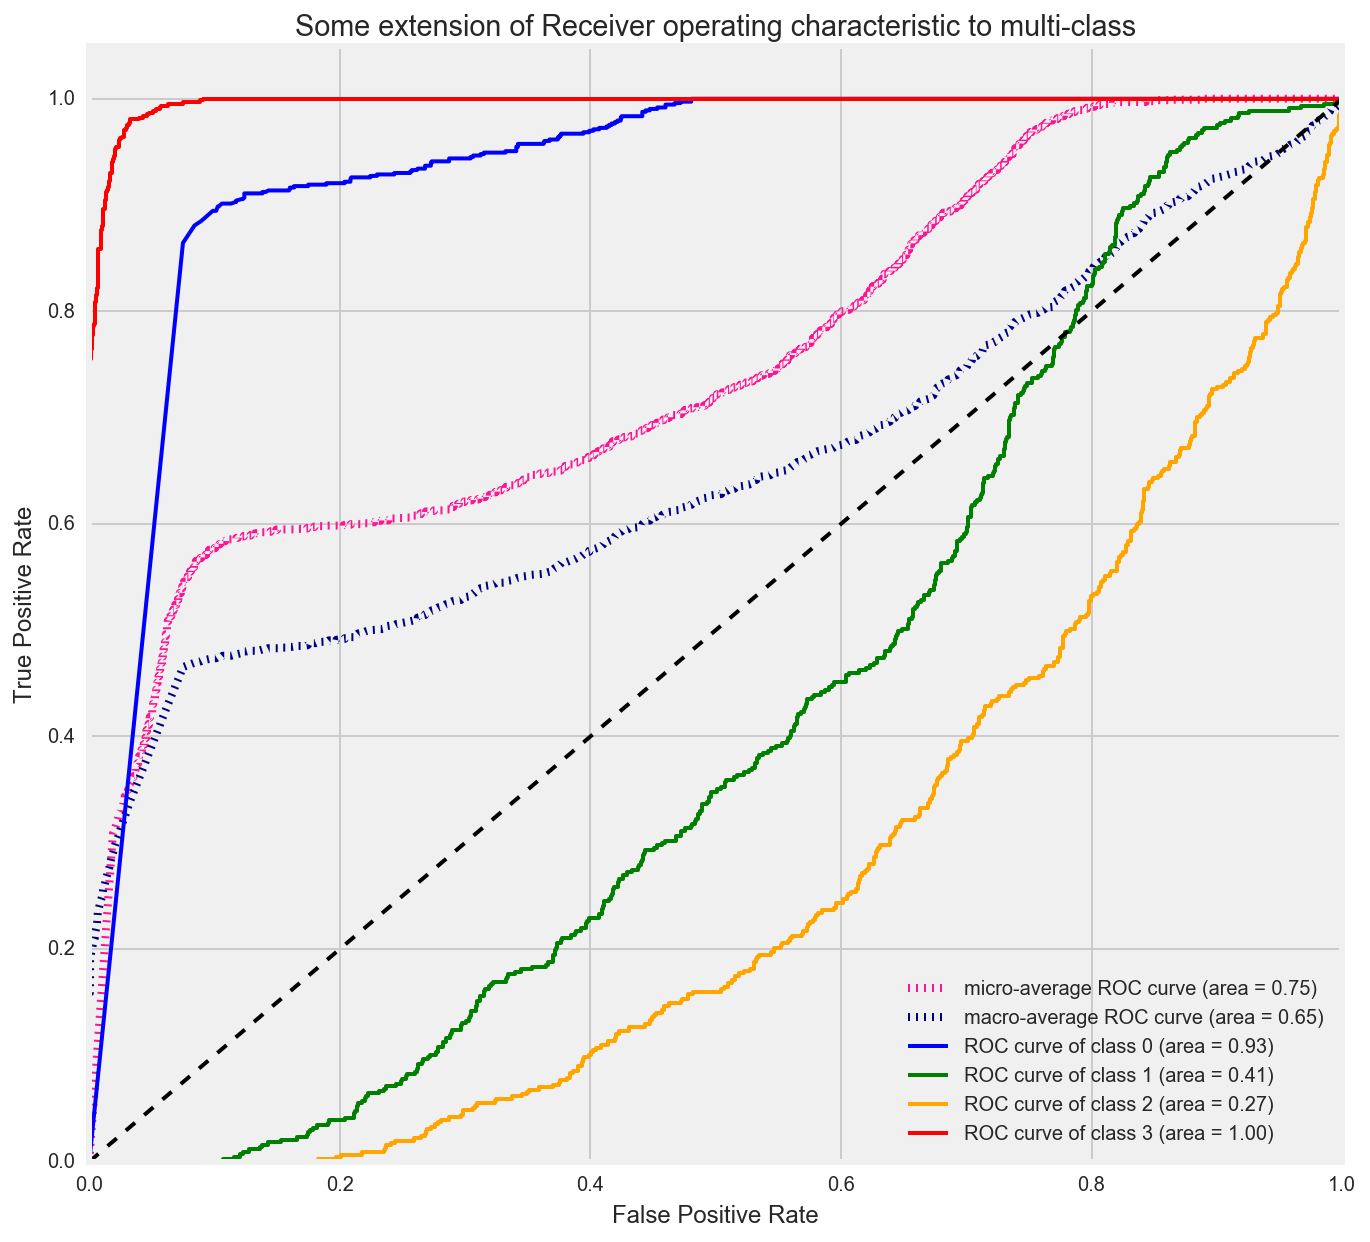

In [58]:
print 'Game Risk'
print 'R-squared - Logreg: ', estimator_logreg_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - Lasso: ', model_lasso_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - Ridge: ', model_ridge_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - ElasticNet: ', model_en_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print '======================================================================'

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_game_risk_roc[:, i], (prediction_logreg_game_risk_proba[:, i] * -1))
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_game_risk_roc.ravel(), (prediction_logreg_game_risk_proba.ravel() * -1))
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'green', 'orange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

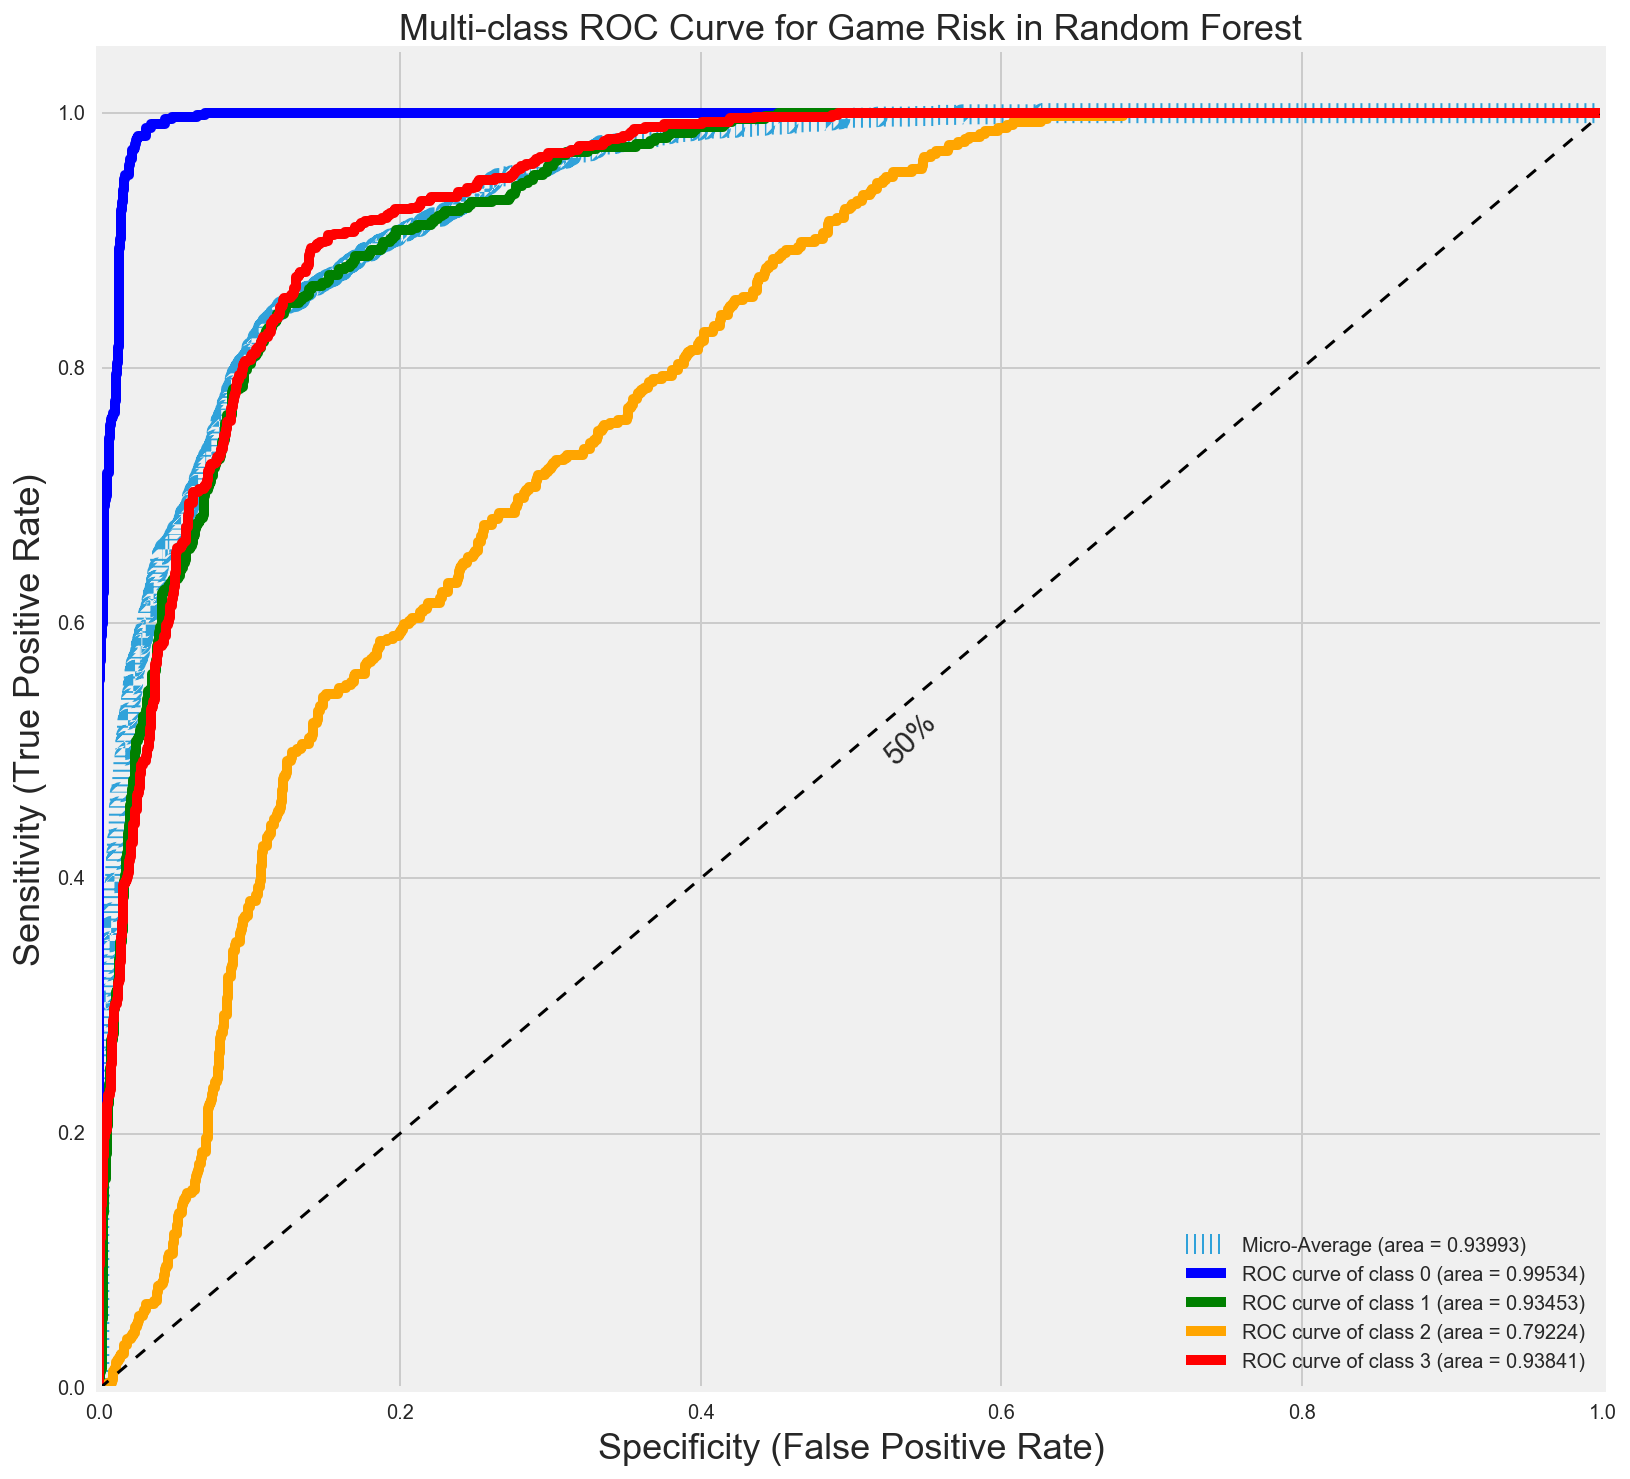

In [71]:
class multi_roc:
    
    # model / estimator
    estimator = False
    line_width = 1.5
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, verbose=False, filter_class=False, figsize=(10,10)):
        _ = ""
        
        # Get predictions if classification report
        if verbose:
            predicted = self.estimator.predict_proba(X_test)    
        
        y_score = self.estimator.predict_proba(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
#             roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[1], tpr[1], label='ROC curve (area = {1:0.5f})' % roc_auc[1], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
        # Plot ROC curve
        
        plt.figure(figsize=figsize)
         
        plt.plot(fpr["micro"], tpr["micro"], lw=10, linestyle=':',
                 label='Micro-Average (area = {0:0.5f})'
                       ''.format(roc_auc["micro"]))
            
        colors = cycle(['blue', 'green', 'orange', 'red'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=5,
#                      label='ROC curve of class (area = %.2f)' % (roc_auc[i]))
                    label='ROC curve of class {0} (area = {1:0.5f})'.format(i, roc_auc[i]))
        
        # 50 / 50 line
        myplot = plt.plot([0, 1], [0, 1], 'k--', linewidth=self.line_width)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Specificity (False Positive Rate)', fontsize=18)
        plt.ylabel('Sensitivity (True Positive Rate)', fontsize=18)
        plt.title('Multi-class ROC Curve for Game Risk in Random Forest', fontsize=18)
        plt.legend(loc="lower right")
        
        #plt.text(24,13.4,'Table Title',size=8)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="none", ec="b", lw=0)
        t = plt.text(.54, .51, "50%", ha="center", va="center", rotation=45,
                   size=15,
                   bbox=bbox_props)
        
#         bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=0)
#         t = plt.text(1.35, .10, report, ha="center", va="center",
#                    size=12,
#                    bbox=bbox_props)
        
        plt.show()

roc = multi_roc(estimator = estimator_logreg_game_risk.best_estimator_)
roc.plot(testX_game_risk_n, (testY_game_risk_n), verbose=True, figsize=(12,12))

In [ ]:
estimator_logreg_game_risk.best_estimator_